# Compare A Fit to $t^{1/2}$ to the Epstein - Plesset Model Prediction

Given that bubbles tend to grow as $R \propto t^{1/2}$ and the Epstein - Plesset model of their growth also follows $t^{1/2}$ dynamics as well, I am curious how the two models differ in their predictions of the nucleation time. While they likely predict very different dynamics over long time periods due to the effects of interfacial tension and pressure, I expect that even if the effect is fractionally large, the short time scale predicted by Epstein - Plesset between nucleation and observation means that the absolute effect may be negligible.

If I could use a $t^{1/2}$ fit to estimate the nucleation time instead, I could avoid some of the numerical instabilities I am running into near the phase transition temperature of CO$_2$.

In [1]:
%load_ext autoreload
%autoreload 2

# sets plotting font to Arial
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']

# standard libraries
import os
import glob
import pickle as pkl

# 3rd party libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize

# custom libraries
import sys
sys.path.append('../../libs/')
import fn
import flow
import plot.bubble as pltb
from conversions import *

# comes after imports from ../../libs/ because I unfortunately 
# created files with the same name there and in ../src/
sys.path.append('../src/')
import objproc as op
import bubble
import analytics as an

### PARAMETERS ###
# directory template containing data files
data_dir_tmp = '../input/ppg_co2/testing/*'
# data filename
data_filename = 'data.pkl'
# data for polyol-CO2 mixture 
# make this on Wang group server with `bi_surf`--read README.txt and copy 1k3f_22c.csv
polyol_data_file = '../input/3k2f_31c.csv'
# equation of state data for CO2 at desired temperature 
eos_co2_file = '../input/eos_co2_25-0C.csv'
# save directory for E-P data
save_path = '../output/debug_fit_fn_ep.pkl' #20211202_72bar_test_ep.pkl'

## Epstein - Plesset Fit

I fit the Epstein - Plesset model of bubble growth to an example bubble growth trajectory. I allow the effective diffusivity $\mathcal{D}$ and nucleation time $t_{nuc}$ to vary.

11 R =  3.877837030746723 v =  0.8717492145038968  vs.  0.6951621573622259
12 R =  4.165953693460643 v =  0.42910894972254043  vs.  0.6951621573622259
15 R =  4.165953693460643 v =  1.317459335944246  vs.  0.6951621573622259
23 R =  5.113692174949114 v =  0.6211162099731206  vs.  0.6951621573622259
28 R =  3.877837030746723 v =  0.8511351674141512  vs.  0.6951621573622259
32 R =  4.946581428972157 v =  1.3750060509628275  vs.  0.6951621573622259
50 R =  3.3368847308126526 v =  0.9796976363138722  vs.  0.6951621573622259
55 R =  5.21563698894391 v =  1.252515780114938  vs.  0.6951621573622259
59 R =  4.1974268011115665 v =  0.6870410040354897  vs.  0.6951621573622259
60 R =  3.3368847308126526 v =  0.24043313478058947  vs.  0.6951621573622259
72 R =  4.29587465532342 v =  1.4647829910714534  vs.  0.6951621573622259
79 R =  5.459348274707441 v =  1.1527834646311317  vs.  0.6951621573622259
83 R =  6.12067373411023 v =  0.7407429153299547  vs.  0.6951621573622259
89 R =  5.299389544119005

t_nuc = 112.949 ms. Error is 0.2660 and tol is 0.0030.
t_nuc = 114.113 ms. Error is 0.1669 and tol is 0.0030.
t_nuc = 114.695 ms. Error is 0.0971 and tol is 0.0030.
t_nuc = 114.987 ms. Error is 0.0502 and tol is 0.0030.
t_nuc = 115.132 ms. Error is 0.0199 and tol is 0.0030.
t_nuc = 115.205 ms. Error is 0.0039 and tol is 0.0030.
t_nuc = 115.169 ms. Error is 0.0108 and tol is 0.0030.
t_nuc = 115.187 ms. Error is 0.0056 and tol is 0.0030.
t_nuc = 115.196 ms. Error is 0.0019 and tol is 0.0030.
Error 0.0019 is below tolerance of 0.0030 for nucleation time t = 115.196 ms
For D = 7.8125e-09, exponent ratio = 0.989
t_nuc = 110.620 ms. Error is 0.4032 and tol is 0.0030.
t_nuc = 112.949 ms. Error is 0.2699 and tol is 0.0030.
t_nuc = 114.113 ms. Error is 0.1698 and tol is 0.0030.
t_nuc = 114.695 ms. Error is 0.0993 and tol is 0.0030.
t_nuc = 114.987 ms. Error is 0.0519 and tol is 0.0030.
t_nuc = 115.132 ms. Error is 0.0213 and tol is 0.0030.
t_nuc = 115.205 ms. Error is 0.0011 and tol is 0.0030.


t_nuc = 112.757 ms. Error is 0.4693 and tol is 0.0030.
t_nuc = 113.920 ms. Error is 0.2758 and tol is 0.0030.
t_nuc = 114.501 ms. Error is 0.1370 and tol is 0.0030.
t_nuc = 114.791 ms. Error is 0.0440 and tol is 0.0030.
t_nuc = 114.937 ms. Error is 0.0315 and tol is 0.0030.
t_nuc = 114.864 ms. Error is 0.0156 and tol is 0.0030.
t_nuc = 114.900 ms. Error is 0.0185 and tol is 0.0030.
t_nuc = 114.882 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 114.873 ms. Error is 0.0094 and tol is 0.0030.
t_nuc = 114.878 ms. Error is 0.0035 and tol is 0.0030.
t_nuc = 114.880 ms. Error is 0.0050 and tol is 0.0030.
t_nuc = 114.879 ms. Error is 0.0025 and tol is 0.0030.
Error 0.0025 is below tolerance of 0.0030 for nucleation time t = 114.879 ms
For D = 1.46875e-08, exponent ratio = 0.735
t_nuc = 110.432 ms. Error is 0.7286 and tol is 0.0030.
t_nuc = 112.757 ms. Error is 0.4733 and tol is 0.0030.
t_nuc = 113.920 ms. Error is 0.2786 and tol is 0.0030.
t_nuc = 114.501 ms. Error is 0.1390 and tol is 0.0030.

t_nuc = 116.831 ms. Error is 0.0514 and tol is 0.0030.
t_nuc = 116.914 ms. Error is 0.0223 and tol is 0.0030.
t_nuc = 116.956 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 116.976 ms. Error is 0.0111 and tol is 0.0030.
t_nuc = 116.966 ms. Error is 0.0034 and tol is 0.0030.
t_nuc = 116.961 ms. Error is 0.0047 and tol is 0.0030.
t_nuc = 116.963 ms. Error is 0.0025 and tol is 0.0030.
Error 0.0025 is below tolerance of 0.0030 for nucleation time t = 116.963 ms
For D = 8.75e-09, exponent ratio = 1.132
t_nuc = 111.679 ms. Error is 0.5593 and tol is 0.0030.
t_nuc = 114.338 ms. Error is 0.3847 and tol is 0.0030.
t_nuc = 115.668 ms. Error is 0.2509 and tol is 0.0030.
t_nuc = 116.332 ms. Error is 0.1547 and tol is 0.0030.
t_nuc = 116.665 ms. Error is 0.0887 and tol is 0.0030.
t_nuc = 116.831 ms. Error is 0.0450 and tol is 0.0030.
t_nuc = 116.914 ms. Error is 0.0169 and tol is 0.0030.
t_nuc = 116.956 ms. Error is 0.0038 and tol is 0.0030.
t_nuc = 116.935 ms. Error is 0.0085 and tol is 0.0030.
t_

t_nuc = 111.633 ms. Error is 0.9351 and tol is 0.0030.
t_nuc = 114.601 ms. Error is 0.6410 and tol is 0.0030.
t_nuc = 116.086 ms. Error is 0.4102 and tol is 0.0030.
t_nuc = 116.828 ms. Error is 0.2413 and tol is 0.0030.
t_nuc = 117.199 ms. Error is 0.1236 and tol is 0.0030.
t_nuc = 117.385 ms. Error is 0.0462 and tol is 0.0030.
t_nuc = 117.478 ms. Error is 0.0233 and tol is 0.0030.
t_nuc = 117.431 ms. Error is 0.0215 and tol is 0.0030.
t_nuc = 117.454 ms. Error is 0.0103 and tol is 0.0030.
t_nuc = 117.443 ms. Error is 0.0125 and tol is 0.0030.
t_nuc = 117.449 ms. Error is 0.0045 and tol is 0.0030.
t_nuc = 117.452 ms. Error is 0.0066 and tol is 0.0030.
t_nuc = 117.450 ms. Error is 0.0034 and tol is 0.0030.
t_nuc = 117.449 ms. Error is 0.0021 and tol is 0.0030.
Error 0.0021 is below tolerance of 0.0030 for nucleation time t = 117.449 ms
For D = 1e-08, exponent ratio = 0.787
t_nuc = 111.633 ms. Error is 1.0732 and tol is 0.0030.
t_nuc = 114.601 ms. Error is 0.7448 and tol is 0.0030.
t_nuc

t_nuc = 115.916 ms. Error is 0.0118 and tol is 0.0030.
t_nuc = 115.898 ms. Error is 0.0062 and tol is 0.0030.
t_nuc = 115.889 ms. Error is 0.0039 and tol is 0.0030.
t_nuc = 115.884 ms. Error is 0.0020 and tol is 0.0030.
Error 0.0020 is below tolerance of 0.0030 for nucleation time t = 115.884 ms
For D = 8.51563e-09, exponent ratio 1.005 deviates from 1 by less than tolerance 0.010.
Model prediction at fit point is R = 4.186202 um.

Analyzed 5 bubbles.

skipping bubble 207 -- not true object or already analyzed
skipping bubble 208 -- not true object or already analyzed
skipping bubble 209 -- not true object or already analyzed

Analyzed videos taken at distance 0.081 m.
There are 3 videos to analyze.

Saving after 5 bubbles analyzed.

31 R =  3.3368847308126526 v =  1.6466357945624979  vs.  0.6984541909859732
36 R =  4.258320033015831 v =  0.7301430634496003  vs.  0.6984541909859732
62 R =  3.3368847308126526 v =  0.8506391647290145  vs.  0.6984541909859732
skipping bubble 0 -- not enou

12 R =  4.753569797354887 v =  0.3602440317073218  vs.  0.6968100183633289
skipping bubble 0 -- not true object or already analyzed
skipping bubble 1 -- not true object or already analyzed
skipping bubble 2 -- not true object or already analyzed
skipping bubble 3 -- not true object or already analyzed
skipping bubble 4 -- not true object or already analyzed
skipping bubble 5 -- not true object or already analyzed
skipping bubble 6 -- not true object or already analyzed
skipping bubble 7 -- not true object or already analyzed
skipping bubble 8 -- not true object or already analyzed
skipping bubble 9 -- not true object or already analyzed
skipping bubble 10 -- not true object or already analyzed
skipping bubble 11 -- not enough data
skipping bubble 12 -- not true object or already analyzed
skipping bubble 13 -- not true object or already analyzed

Analyzed videos taken at distance 0.069 m.
There are 3 videos to analyze.

Saving after 6 bubbles analyzed.



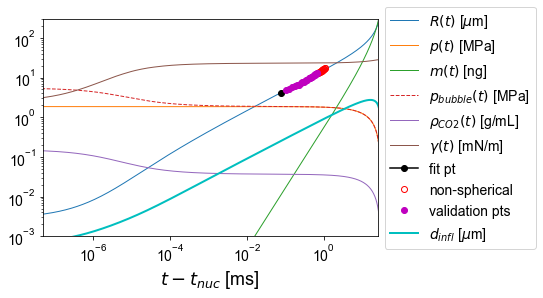

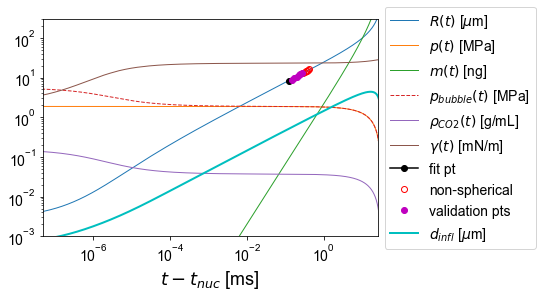

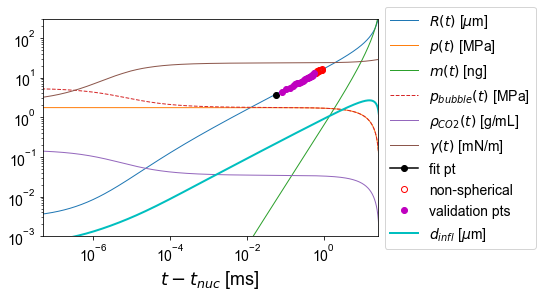

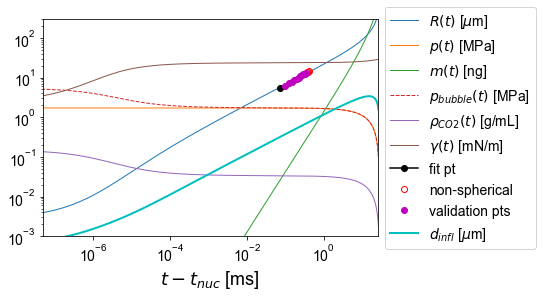

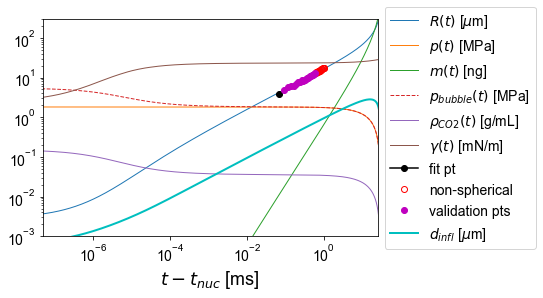

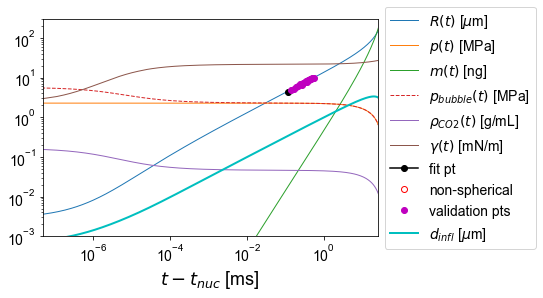

In [48]:
# fits Epstein - Plesset model
# GROWTH MODEL PARAMETERS
growth_fn = bubble.grow
fit_fn = an.fit_growth_to_pts
dt = 1E-10 # [s]
R_nuc = 3E-9 # higher value bypasses numerical challenges at nm scale [m]

# FITTING PARAMETERS
frac_lo = 0.95
frac_hi = 1.05
# guess for effective diffusivity constant [m^2/s]
D_lo = 5E-9
D_hi = 1.5E-8
err_tol = 0.003
err_fn = an.calc_abs_sgn_mse
rms_tol = -0.02 # keep high--this is used to fit D, must allow for noise in data
exp_ratio_tol = 0.01
fit_fn_params = {}
save_freq = 1

# PLOTTING PARAMETERS
x_lim = [1E-2, 10]
y_lim = [1, 30]

# USER PARAMETERS
n_fit = -1

# globs list of data directories
data_dir_list = glob.glob(data_dir_tmp)

# fits effective diffusivity D and nucleation time t_nuc
data = an.fit_D_t_nuc(data_filename, data_dir_list, polyol_data_file,
                        eos_co2_file, frac_lo, frac_hi,
                        D_lo, D_hi, growth_fn, dt, R_nuc, fit_fn_params,
                        exp_ratio_tol, n_fit=n_fit, show_plots=True,
                        fit_fn=fit_fn, save_path=save_path, save_freq=save_freq)

### Some Useful Functions

In [49]:
# some useful functions

# defines functional form of square-root fit
def sqrt_fit(t, D, t_nuc):
    """Square-root fit R(t) = sqrt(D*(t - t_nuc))."""
    return np.sqrt(D*(np.abs(t - t_nuc)))

def compare_ep_sqrt(t_nuc_ep, t_fit_ep, R_fit_ep, t_nuc_sqrt, t_fit_sqrt, R_fit_sqrt, t_bub, R_bub, 
                   lw=2, ax_fs=16, tk_fs=14, l_fs=12, x_lim=None, y_lim=None):
    """Compares predictions by Epstein - Plesset fit and t^1/2 fit against data."""
    # plots comparison of square-root fit and Epstein - Plesset model alongside true bubble growth data
    # creates figure
    fig = plt.figure()
    ax = fig.add_subplot(111)

    # plots data
    ax.plot(np.asarray(t_fit_ep - t_nuc_ep)*s_2_ms, np.asarray(R_fit_ep)*m_2_um, 
            'r--', lw=lw, label='E - P')
    ax.plot(np.asarray(t_fit_sqrt - t_nuc_sqrt)*s_2_ms, np.asarray(R_fit_sqrt)*m_2_um, 
            'b', lw=lw, label=r'$\propto t^{1/2}$')
    ax.plot((t_bub - t_nuc_ep)*s_2_ms, R_bub*m_2_um, 'k', lw=0, 
            marker='o', fillstyle='none', label='data (E-P)')
    ax.plot((t_bub - t_nuc_sqrt)*s_2_ms, R_bub*m_2_um, 'k', lw=0, 
            marker='^', fillstyle='none', label=r'data ($t^{1/2}$)')

    # formats plot
    ax.set_xlabel(r'$t - t_{nuc}$ [ms]', fontsize=ax_fs)
    ax.set_ylabel(r'$R(t)$ [$\mu$m]', fontsize=ax_fs)
    ax.tick_params(axis='both', labelsize=tk_fs)
    ax.legend(fontsize=l_fs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    if x_lim:
        ax.set_xlim(x_lim)
    if y_lim:
        ax.set_ylim(y_lim)
    
    return ax

### Load Data for Comparison of Epstein - Plesset and $t^{1/2}$ Fits

In [50]:
load_path = '../output/20211202_72bar_21-32_35-74.pkl'

with open(load_path, 'rb') as f:
    data = pkl.load(f)

Plots differences in Epstein - Plesset and $t^{1/2}$ predictions.

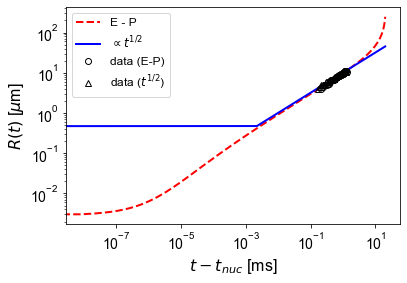

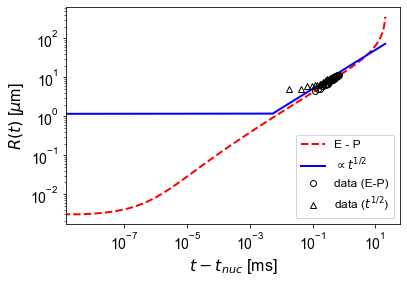

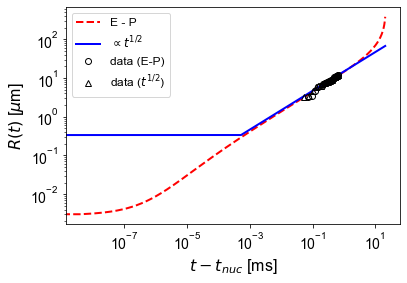

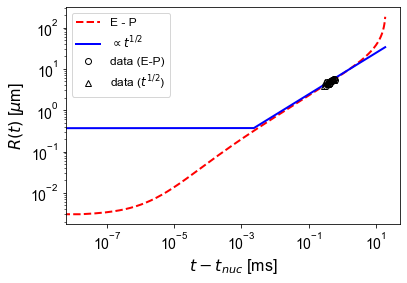

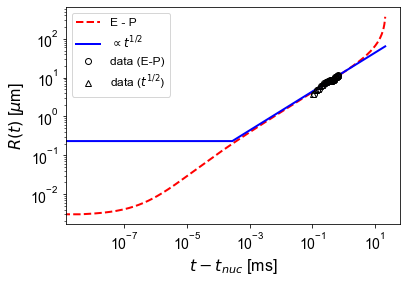

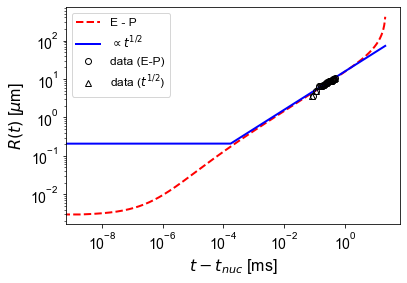

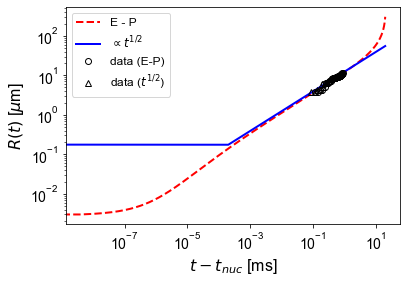

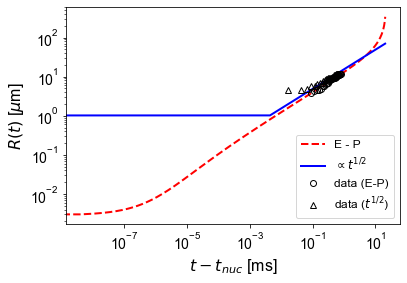

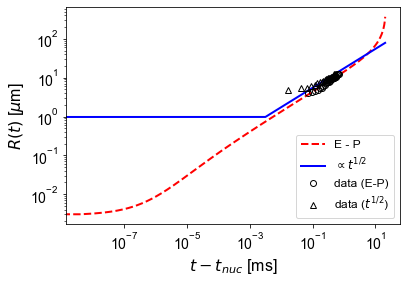

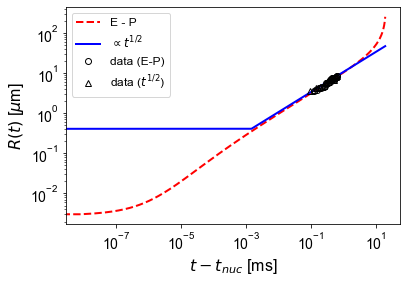

In [51]:
n_plot = 10
x_lim = None # [1E-5, 10]
y_lim = None # [1E-1, 100]
# extracts fit data
ct = 0
for vid_num in data.keys():
    vid_data = data[vid_num]['data']
    for bub_num in vid_data.keys():
        bub_data = vid_data[bub_num]
        # extracts fit data
        t_fit_ep = bub_data['t_fit']
        R_fit_ep = bub_data['R_fit']
        t_bub = bub_data['t_bub']
        R_bub = bub_data['R_bub']
        D_ep = bub_data['D']
        t_nuc_ep = bub_data['t_nuc']
        
        # fits square-root function to bubble growth data
        try:
            popt, pcov = scipy.optimize.curve_fit(sqrt_fit, t_bub, R_bub, p0=[D_ep, t_nuc_ep])
        except:
            print('Failed to fit data')
            continue
        D_sqrt, t_nuc_sqrt = popt
        # computes predictions of fit
        t_fit_sqrt = t_fit_ep
        R_fit_sqrt = sqrt_fit(t_fit_sqrt, *popt)
        
        # plots differences in predictions
        compare_ep_sqrt(t_nuc_ep, t_fit_ep, R_fit_ep, t_nuc_sqrt, t_fit_sqrt, R_fit_sqrt, 
                       t_bub, R_bub, x_lim=x_lim, y_lim=y_lim)
        
        ct += 1
        if ct == n_plot:
            break
            
    if ct == n_plot:
        break

### Predict Nucleation Time with $t^{1/2}$ Fit

Having shown that the $t^{1/2}$ fit describes early bubble growth from nucleation within experimental uncertainty, we can use it to estimate the nucleation time with confidence. Below, we apply this technique to predict the nucleation time for a few bubbles.

### Try Using Shooting Method and Binary Search for Square-root Fit

Hopefully this gives better accuracy.


Analyzing bubble 23 at 0.081 m.

t_nuc = 109.313 ms. Error is 0.6777 and tol is 0.0030.
t_nuc = 112.190 ms. Error is 0.4225 and tol is 0.0030.
t_nuc = 113.629 ms. Error is 0.2463 and tol is 0.0030.
t_nuc = 114.348 ms. Error is 0.1290 and tol is 0.0030.
t_nuc = 114.707 ms. Error is 0.0494 and tol is 0.0030.
t_nuc = 114.887 ms. Error is 0.0532 and tol is 0.0030.
t_nuc = 114.797 ms. Error is 0.0170 and tol is 0.0030.
t_nuc = 114.752 ms. Error is 0.0322 and tol is 0.0030.
t_nuc = 114.775 ms. Error is 0.0191 and tol is 0.0030.
t_nuc = 114.786 ms. Error is 0.0060 and tol is 0.0030.
t_nuc = 114.792 ms. Error is 0.0113 and tol is 0.0030.
t_nuc = 114.789 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 114.787 ms. Error is 0.0023 and tol is 0.0030.
Error 0.0023 is below tolerance of 0.0030 for nucleation time t = 114.787 ms
For D = 2.2e-07, exponent ratio = 0.411
t_nuc = 109.313 ms. Error is 0.8450 and tol is 0.0030.
t_nuc = 112.190 ms. Error is 0.5408 and tol is 0.0030.
t_nuc = 113.629 ms. Erro

t_nuc = 115.255 ms. Error is 0.0078 and tol is 0.0030.
t_nuc = 115.266 ms. Error is 0.0118 and tol is 0.0030.
t_nuc = 115.261 ms. Error is 0.0052 and tol is 0.0030.
t_nuc = 115.258 ms. Error is 0.0043 and tol is 0.0030.
t_nuc = 115.259 ms. Error is 0.0019 and tol is 0.0030.
Error 0.0019 is below tolerance of 0.0030 for nucleation time t = 115.259 ms
For D = 3.1e-07, exponent ratio = 1.235
t_nuc = 109.514 ms. Error is 0.5514 and tol is 0.0030.
t_nuc = 112.396 ms. Error is 0.3594 and tol is 0.0030.
t_nuc = 113.837 ms. Error is 0.2272 and tol is 0.0030.
t_nuc = 114.557 ms. Error is 0.1376 and tol is 0.0030.
t_nuc = 114.917 ms. Error is 0.0782 and tol is 0.0030.
t_nuc = 115.098 ms. Error is 0.0398 and tol is 0.0030.
t_nuc = 115.188 ms. Error is 0.0164 and tol is 0.0030.
t_nuc = 115.233 ms. Error is 0.0037 and tol is 0.0030.
t_nuc = 115.255 ms. Error is 0.0130 and tol is 0.0030.
t_nuc = 115.244 ms. Error is 0.0077 and tol is 0.0030.
t_nuc = 115.238 ms. Error is 0.0044 and tol is 0.0030.
t_n

For D = 5.98594e-07, exponent ratio = 0.942
t_nuc = 109.328 ms. Error is 1.2637 and tol is 0.0030.
t_nuc = 112.205 ms. Error is 0.8247 and tol is 0.0030.
t_nuc = 113.643 ms. Error is 0.5183 and tol is 0.0030.
t_nuc = 114.363 ms. Error is 0.3064 and tol is 0.0030.
t_nuc = 114.722 ms. Error is 0.1623 and tol is 0.0030.
t_nuc = 114.902 ms. Error is 0.0664 and tol is 0.0030.
t_nuc = 114.992 ms. Error is 0.0071 and tol is 0.0030.
t_nuc = 115.037 ms. Error is 0.0362 and tol is 0.0030.
t_nuc = 115.015 ms. Error is 0.0161 and tol is 0.0030.
t_nuc = 115.003 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 114.998 ms. Error is 0.0030 and tol is 0.0030.
t_nuc = 115.000 ms. Error is 0.0040 and tol is 0.0030.
t_nuc = 114.999 ms. Error is 0.0017 and tol is 0.0030.
Error 0.0017 is below tolerance of 0.0030 for nucleation time t = 114.999 ms
For D = 6.99297e-07, exponent ratio = 1.098
t_nuc = 109.328 ms. Error is 1.2075 and tol is 0.0030.
t_nuc = 112.205 ms. Error is 0.7847 and tol is 0.0030.
t_nuc = 11

t_nuc = 117.444 ms. Error is 0.0140 and tol is 0.0030.
t_nuc = 117.450 ms. Error is 0.0073 and tol is 0.0030.
t_nuc = 117.453 ms. Error is 0.0037 and tol is 0.0030.
t_nuc = 117.451 ms. Error is 0.0044 and tol is 0.0030.
t_nuc = 117.452 ms. Error is 0.0016 and tol is 0.0030.
Error 0.0016 is below tolerance of 0.0030 for nucleation time t = 117.452 ms
For D = 3.55e-07, exponent ratio = 0.716
t_nuc = 111.692 ms. Error is 1.0973 and tol is 0.0030.
t_nuc = 114.631 ms. Error is 0.7136 and tol is 0.0030.
t_nuc = 116.101 ms. Error is 0.4460 and tol is 0.0030.
t_nuc = 116.836 ms. Error is 0.2613 and tol is 0.0030.
t_nuc = 117.203 ms. Error is 0.1362 and tol is 0.0030.
t_nuc = 117.387 ms. Error is 0.0544 and tol is 0.0030.
t_nuc = 117.479 ms. Error is 0.0160 and tol is 0.0030.
t_nuc = 117.433 ms. Error is 0.0301 and tol is 0.0030.
t_nuc = 117.456 ms. Error is 0.0146 and tol is 0.0030.
t_nuc = 117.467 ms. Error is 0.0067 and tol is 0.0030.
t_nuc = 117.461 ms. Error is 0.0087 and tol is 0.0030.
t_


Analyzed 6 bubbles.


Analyzed videos taken at distance 0.081 m.
There are 3 videos to analyze.

Saving after 6 bubbles analyzed.


Analyzing bubble 36 at 0.075 m.

t_nuc = 102.949 ms. Error is 0.9758 and tol is 0.0030.
t_nuc = 105.658 ms. Error is 0.6349 and tol is 0.0030.
t_nuc = 107.012 ms. Error is 0.3979 and tol is 0.0030.
t_nuc = 107.690 ms. Error is 0.2353 and tol is 0.0030.
t_nuc = 108.028 ms. Error is 0.1258 and tol is 0.0030.
t_nuc = 108.198 ms. Error is 0.0541 and tol is 0.0030.
t_nuc = 108.282 ms. Error is 0.0124 and tol is 0.0030.
t_nuc = 108.325 ms. Error is 0.0246 and tol is 0.0030.
t_nuc = 108.303 ms. Error is 0.0090 and tol is 0.0030.
t_nuc = 108.293 ms. Error is 0.0073 and tol is 0.0030.
t_nuc = 108.298 ms. Error is 0.0029 and tol is 0.0030.
Error 0.0029 is below tolerance of 0.0030 for nucleation time t = 108.298 ms
For D = 2.2e-07, exponent ratio = 1.138
t_nuc = 102.949 ms. Error is 0.6985 and tol is 0.0030.
t_nuc = 105.658 ms. Error is 0.4369 and tol is 0.0030.
t_

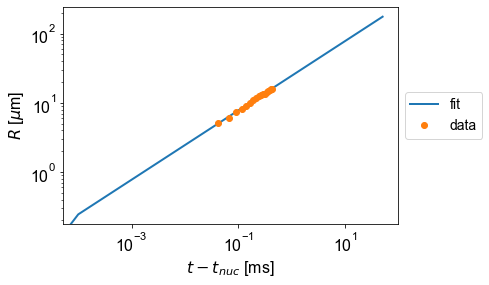

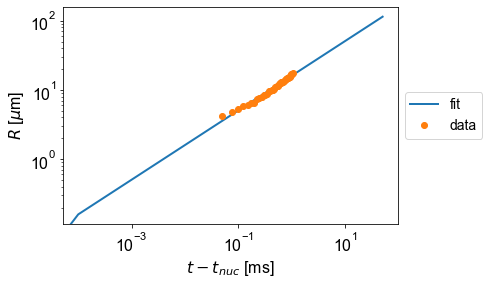

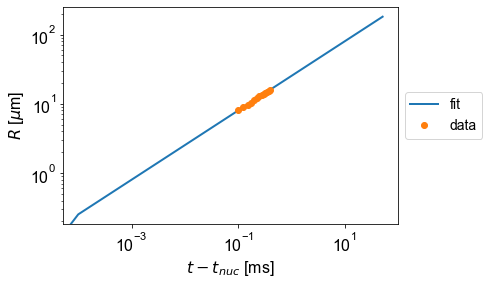

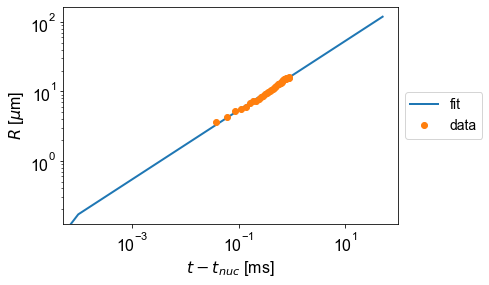

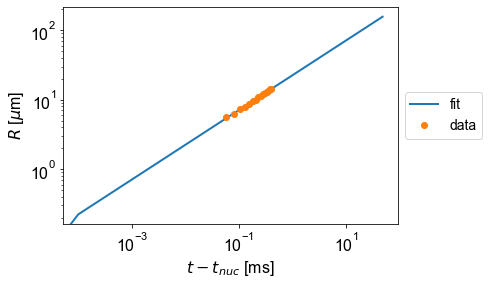

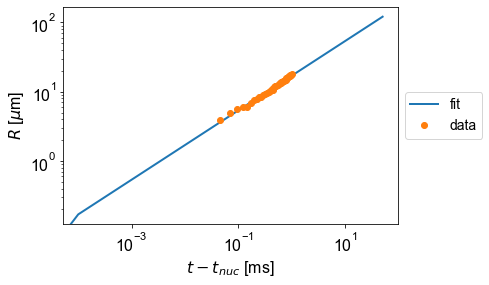

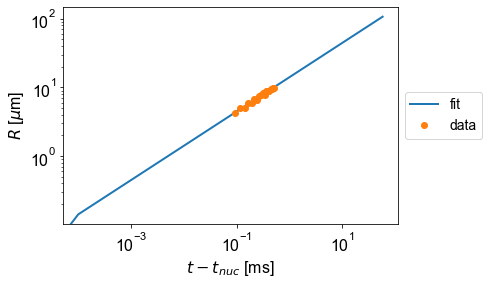

In [54]:
data_dir = '../output'

# fits Epstein - Plesset model
save_path_sqrt = os.path.join(data_dir, 'debug_fit_fn_sqrt.pkl')
# GROWTH MODEL PARAMETERS
growth_fn = bubble.sqrt_growth
dt = 1E-7 # [s]
tf = 0.1 / 0.6 # [s] final time for growth model

# FITTING PARAMETERS
frac_lo = 0.9
frac_hi = 1.0
t_nuc_guess_fn = an.t_nuc_guess_frac
t_nuc_guess_params = {'frac_lo' : frac_lo, 'frac_hi' : frac_hi}
# guess for effective diffusivity constant [m^2/s]
D_lo = 4E-8
D_hi = 4E-7
err_tol = 0.003
err_fn = an.calc_abs_sgn_mse
rms_tol = -0.02 # keep high--this is used to fit D, must allow for noise in data
exp_ratio_tol = 0.01
fit_fn_params = {'tf' : tf, 'dt' : dt}#{'maxfev' : 100000}
save_freq = 1
fit_fn = an.fit_growth_to_pts

# fits effective diffusivity D and nucleation time t_nuc

data_sqrt = an.fit_D_t_nuc_genl(data_filename, data_dir_list,
                D_lo, D_hi, growth_fn, fit_fn_params,
                exp_ratio_tol, t_nuc_guess_fn, t_nuc_guess_params,
                save_path=save_path_sqrt)

### Compare Fits Using Modified Fit Function

In [55]:
with open(os.path.join(data_dir, 'debug_fit_fn_ep.pkl'), 'rb') as f:
    data_ep = pkl.load(f)
    
with open(os.path.join(data_dir, 'debug_fit_fn_sqrt.pkl'), 'rb') as f:
    data_sqrt = pkl.load(f)

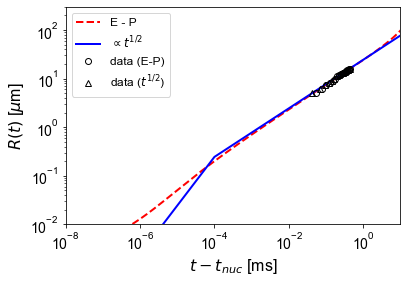

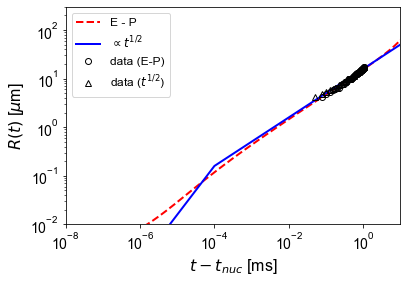

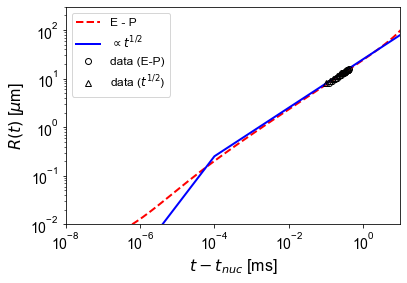

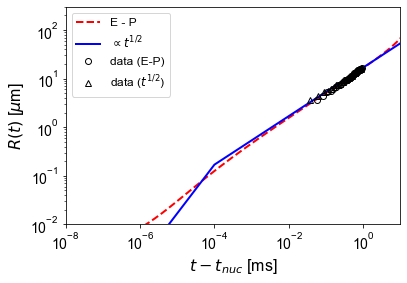

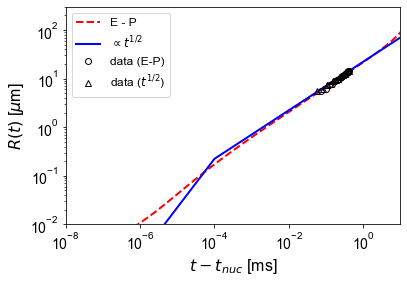

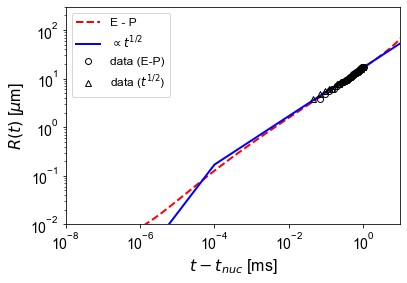

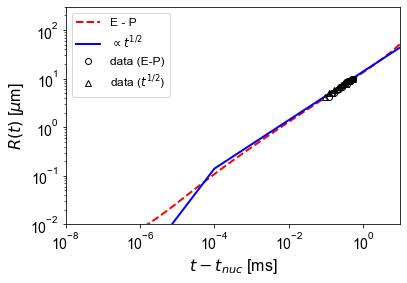

In [58]:
n_plot = 10
x_lim = [1E-8, 10]
y_lim = [1E-2, 300]

# plot parameters
n_bins = 40
t_fs = 18
ax_fs = 18
tk_fs = 14

dt_nuc = []
dt_nuc_frac = []
dd_nuc = []

# extracts fit data
ct = 0
for vid_num in data_ep.keys():
    v_ep = data_ep[vid_num]['data']
    v = data_ep[vid_num]['metadata']['v_max']
    v_sqrt = data_sqrt[vid_num]['data']
    for bub_num in v_ep.keys():
        # gets bubble data for each fit method
        bub_ep = v_ep[bub_num]
        bub_sqrt = v_sqrt[bub_num]
        
        # extracts measured bubble data
        t_bub = bub_ep['t_bub']
        R_bub = bub_ep['R_bub']
        # extracts E-P fit data
        t_nuc_ep = bub_ep['t_nuc']
        t_fit_ep = bub_ep['t_fit']
        R_fit_ep = bub_ep['R_fit']
        D_ep = bub_ep['D']
        t_nuc_ep = bub_ep['t_nuc']
        # extracts sqrt fit data
        t_nuc_sqrt = bub_sqrt['t_nuc']
        t_fit_sqrt = bub_sqrt['t_fit']
        R_fit_sqrt = bub_sqrt['R_fit']
    
        # computes discrepancy in nucleation time prediction
        dt_nuc += [t_nuc_sqrt - t_nuc_ep]
        dt_nuc_frac += [(t_nuc_sqrt - t_nuc_ep) / t_nuc_ep]
        
        # computes discrepancy in nucleation location
        d_nuc_sqrt = v*t_nuc_sqrt
        d_nuc_ep = v*t_nuc_ep
        dd_nuc += [d_nuc_sqrt - d_nuc_ep]
        
        # plots differences in predictions
        compare_ep_sqrt(t_nuc_ep, t_fit_ep, R_fit_ep, t_nuc_sqrt, t_fit_sqrt, R_fit_sqrt, 
                       t_bub, R_bub, x_lim=x_lim, y_lim=y_lim)
        
        
        ct += 1
        if ct == n_plot:
            break
            
    if ct == n_plot:
        break

### Histogram of Discrepancy in Prediction of Nucleation Time

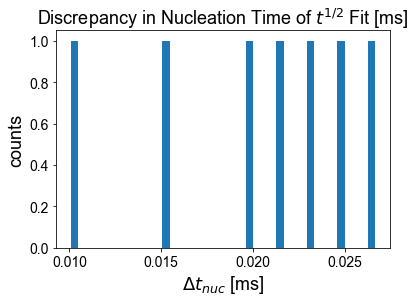

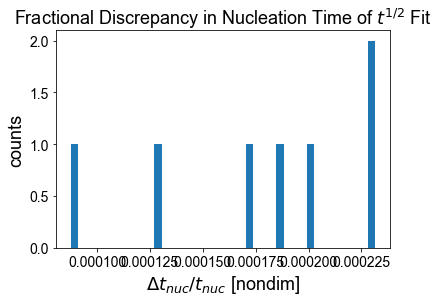

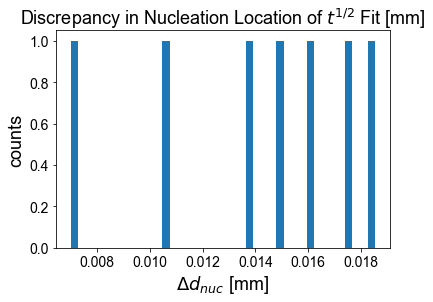

In [59]:
       
# plots distribution of discrepancies in nucleation time
plt.figure()
plt.hist(np.asarray(dt_nuc)*s_2_ms, bins=n_bins)
plt.title(r'Discrepancy in Nucleation Time of $t^{1/2}$ Fit [ms]', fontsize=t_fs)
plt.xlabel(r'$\Delta t_{nuc}$ [ms]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

plt.figure()
plt.hist(dt_nuc_frac, bins=n_bins)
plt.title(r'Fractional Discrepancy in Nucleation Time of $t^{1/2}$ Fit', fontsize=t_fs)
plt.xlabel(r'$\Delta t_{nuc} / t_{nuc}$ [nondim]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

# plots distribution of discrepancies in nucleation location
plt.figure()
plt.hist(np.asarray(dd_nuc)*m_2_mm, bins=n_bins)
plt.title(r'Discrepancy in Nucleation Location of $t^{1/2}$ Fit [mm]', fontsize=t_fs)
plt.xlabel(r'$\Delta d_{nuc}$ [mm]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

## Analyze More Videos for More Meaningful Statistics

In [4]:
data_dir_tmp = '../input/ppg_co2/20211202_72bar/*'

# globs list of data directories
data_dir_list = glob.glob(data_dir_tmp)


data_dir = '../output'

# fits Epstein - Plesset model
save_path_sqrt = os.path.join(data_dir, '20211202_72bar_21-32_35-74_sqrt.pkl')
# GROWTH MODEL PARAMETERS
growth_fn = bubble.sqrt_growth
dt = 1E-6 # [s]
tf = 0.1 / 0.6 # [s] final time for growth model

# FITTING PARAMETERS
frac_lo = 0.9
frac_hi = 1.0
t_nuc_guess_fn = an.t_nuc_guess_frac
t_nuc_guess_params = {'frac_lo' : frac_lo, 'frac_hi' : frac_hi}
# guess for effective diffusivity constant [m^2/s]
D_lo = 4E-8
D_hi = 4E-7
err_tol = 0.003
err_fn = an.calc_abs_sgn_mse
rms_tol = -0.02 # keep high--this is used to fit D, must allow for noise in data
exp_ratio_tol = 0.01
fit_fn_params = {'tf' : tf, 'dt' : dt}#{'maxfev' : 100000}
save_freq = 1
fit_fn = an.fit_growth_to_pts

# fits effective diffusivity D and nucleation time t_nuc

data_sqrt = an.fit_D_t_nuc_genl(data_filename, data_dir_list,
                D_lo, D_hi, growth_fn, fit_fn_params,
                exp_ratio_tol, t_nuc_guess_fn, t_nuc_guess_params,
                save_path=save_path_sqrt, show_plots=False, save_freq=save_freq)

No data found at ../output\20211202_72bar_21-32_35-74_sqrt.pkl. Start analysis from beginning.

Analyzing bubble 36 at 0.083 m.

t_nuc = 91.590 ms. Error is 0.5659 and tol is 0.0030.
t_nuc = 94.000 ms. Error is 0.3736 and tol is 0.0030.
t_nuc = 95.205 ms. Error is 0.2427 and tol is 0.0030.
t_nuc = 95.807 ms. Error is 0.1558 and tol is 0.0030.
t_nuc = 96.109 ms. Error is 0.1008 and tol is 0.0030.
t_nuc = 96.259 ms. Error is 0.0686 and tol is 0.0030.
t_nuc = 96.335 ms. Error is 0.0528 and tol is 0.0030.
t_nuc = 96.372 ms. Error is 0.0456 and tol is 0.0030.
t_nuc = 96.391 ms. Error is 0.0408 and tol is 0.0030.
t_nuc = 96.401 ms. Error is 0.0374 and tol is 0.0030.
t_nuc = 96.405 ms. Error is 0.0351 and tol is 0.0030.
t_nuc = 96.408 ms. Error is 0.0334 and tol is 0.0030.
t_nuc = 96.409 ms. Error is 0.0323 and tol is 0.0030.
t_nuc = 96.409 ms. Error is 0.0312 and tol is 0.0030.
t_nuc = 96.410 ms. Error is 0.0306 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucle

For D = 1.975e-07, exponent ratio 1.000 deviates from 1 by less than tolerance 0.010.

Analyzed 5 bubbles.


Analyzing bubble 42 at 0.083 m.

t_nuc = 90.585 ms. Error is 0.9302 and tol is 0.0030.
t_nuc = 92.969 ms. Error is 0.5998 and tol is 0.0030.
t_nuc = 94.161 ms. Error is 0.3702 and tol is 0.0030.
t_nuc = 94.757 ms. Error is 0.2128 and tol is 0.0030.
t_nuc = 95.055 ms. Error is 0.1075 and tol is 0.0030.
t_nuc = 95.204 ms. Error is 0.0407 and tol is 0.0030.
t_nuc = 95.279 ms. Error is 0.0249 and tol is 0.0030.
t_nuc = 95.241 ms. Error is 0.0226 and tol is 0.0030.
t_nuc = 95.260 ms. Error is 0.0054 and tol is 0.0030.
t_nuc = 95.251 ms. Error is 0.0158 and tol is 0.0030.
t_nuc = 95.255 ms. Error is 0.0107 and tol is 0.0030.
t_nuc = 95.258 ms. Error is 0.0065 and tol is 0.0030.
t_nuc = 95.259 ms. Error is 0.0026 and tol is 0.0030.
Error 0.0026 is below tolerance of 0.0030 for nucleation time t = 95.259 ms
For D = 2.2e-07, exponent ratio = 0.888
t_nuc = 90.585 ms. Error is 1.1474 and t

Nucleation time is 95.184 ms.
For D = 2.2e-07, exponent ratio = 0.510
t_nuc = 90.575 ms. Error is 1.8847 and tol is 0.0030.
t_nuc = 92.959 ms. Error is 1.2254 and tol is 0.0030.
t_nuc = 94.151 ms. Error is 0.7627 and tol is 0.0030.
t_nuc = 94.747 ms. Error is 0.4404 and tol is 0.0030.
t_nuc = 95.044 ms. Error is 0.2195 and tol is 0.0030.
t_nuc = 95.193 ms. Error is 0.0758 and tol is 0.0030.
t_nuc = 95.268 ms. Error is 0.0647 and tol is 0.0030.
t_nuc = 95.231 ms. Error is 0.0338 and tol is 0.0030.
t_nuc = 95.249 ms. Error is 0.0372 and tol is 0.0030.
t_nuc = 95.240 ms. Error is 0.0071 and tol is 0.0030.
t_nuc = 95.235 ms. Error is 0.0235 and tol is 0.0030.
t_nuc = 95.238 ms. Error is 0.0159 and tol is 0.0030.
t_nuc = 95.239 ms. Error is 0.0101 and tol is 0.0030.
t_nuc = 95.239 ms. Error is 0.0051 and tol is 0.0030.
t_nuc = 95.240 ms. Error is 0.0035 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 95.240 ms.
For D = 3.1e-07, exponent ratio = 

t_nuc = 93.177 ms. Error is 0.3323 and tol is 0.0030.
t_nuc = 94.371 ms. Error is 0.2019 and tol is 0.0030.
t_nuc = 94.969 ms. Error is 0.1140 and tol is 0.0030.
t_nuc = 95.267 ms. Error is 0.0562 and tol is 0.0030.
t_nuc = 95.417 ms. Error is 0.0202 and tol is 0.0030.
t_nuc = 95.491 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 95.454 ms. Error is 0.0113 and tol is 0.0030.
t_nuc = 95.473 ms. Error is 0.0066 and tol is 0.0030.
t_nuc = 95.482 ms. Error is 0.0022 and tol is 0.0030.
Error 0.0022 is below tolerance of 0.0030 for nucleation time t = 95.482 ms
For D = 1.6375e-07, exponent ratio = 1.058
t_nuc = 90.788 ms. Error is 0.5103 and tol is 0.0030.
t_nuc = 93.177 ms. Error is 0.3237 and tol is 0.0030.
t_nuc = 94.371 ms. Error is 0.1957 and tol is 0.0030.
t_nuc = 94.969 ms. Error is 0.1093 and tol is 0.0030.
t_nuc = 95.267 ms. Error is 0.0527 and tol is 0.0030.
t_nuc = 95.417 ms. Error is 0.0174 and tol is 0.0030.
t_nuc = 95.491 ms. Error is 0.0104 and tol is 0.0030.
t_nuc = 95.454 ms

t_nuc = 95.523 ms. Error is 0.0285 and tol is 0.0030.
t_nuc = 95.598 ms. Error is 0.0050 and tol is 0.0030.
t_nuc = 95.635 ms. Error is 0.0162 and tol is 0.0030.
t_nuc = 95.616 ms. Error is 0.0086 and tol is 0.0030.
t_nuc = 95.607 ms. Error is 0.0044 and tol is 0.0030.
t_nuc = 95.602 ms. Error is 0.0016 and tol is 0.0030.
Error 0.0016 is below tolerance of 0.0030 for nucleation time t = 95.602 ms
For D = 1.75e-07, exponent ratio = 1.019
t_nuc = 90.889 ms. Error is 0.5285 and tol is 0.0030.
t_nuc = 93.281 ms. Error is 0.3360 and tol is 0.0030.
t_nuc = 94.477 ms. Error is 0.2036 and tol is 0.0030.
t_nuc = 95.075 ms. Error is 0.1142 and tol is 0.0030.
t_nuc = 95.374 ms. Error is 0.0552 and tol is 0.0030.
t_nuc = 95.523 ms. Error is 0.0174 and tol is 0.0030.
t_nuc = 95.598 ms. Error is 0.0115 and tol is 0.0030.
t_nuc = 95.560 ms. Error is 0.0053 and tol is 0.0030.
t_nuc = 95.579 ms. Error is 0.0065 and tol is 0.0030.
t_nuc = 95.570 ms. Error is 0.0030 and tol is 0.0030.
t_nuc = 95.565 ms. 

t_nuc = 96.331 ms. Error is 0.2138 and tol is 0.0030.
t_nuc = 96.634 ms. Error is 0.1261 and tol is 0.0030.
t_nuc = 96.786 ms. Error is 0.0699 and tol is 0.0030.
t_nuc = 96.861 ms. Error is 0.0384 and tol is 0.0030.
t_nuc = 96.899 ms. Error is 0.0233 and tol is 0.0030.
t_nuc = 96.918 ms. Error is 0.0093 and tol is 0.0030.
t_nuc = 96.928 ms. Error is 0.0180 and tol is 0.0030.
t_nuc = 96.923 ms. Error is 0.0095 and tol is 0.0030.
t_nuc = 96.921 ms. Error is 0.0019 and tol is 0.0030.
Error 0.0019 is below tolerance of 0.0030 for nucleation time t = 96.921 ms
For D = 2.2e-07, exponent ratio = 1.549
t_nuc = 92.090 ms. Error is 0.5888 and tol is 0.0030.
t_nuc = 94.514 ms. Error is 0.3736 and tol is 0.0030.
t_nuc = 95.726 ms. Error is 0.2253 and tol is 0.0030.
t_nuc = 96.331 ms. Error is 0.1249 and tol is 0.0030.
t_nuc = 96.634 ms. Error is 0.0589 and tol is 0.0030.
t_nuc = 96.786 ms. Error is 0.0187 and tol is 0.0030.
t_nuc = 96.861 ms. Error is 0.0212 and tol is 0.0030.
t_nuc = 96.824 ms. E

t_nuc = 96.287 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 96.277 ms. Error is 0.0046 and tol is 0.0030.
t_nuc = 96.273 ms. Error is 0.0023 and tol is 0.0030.
Error 0.0023 is below tolerance of 0.0030 for nucleation time t = 96.273 ms
For D = 1.69375e-07, exponent ratio 0.997 deviates from 1 by less than tolerance 0.010.

Analyzed 25 bubbles.


Analyzing bubble 274 at 0.083 m.

t_nuc = 91.850 ms. Error is 0.7048 and tol is 0.0030.
t_nuc = 94.267 ms. Error is 0.4616 and tol is 0.0030.
t_nuc = 95.476 ms. Error is 0.2939 and tol is 0.0030.
t_nuc = 96.080 ms. Error is 0.1801 and tol is 0.0030.
t_nuc = 96.382 ms. Error is 0.1048 and tol is 0.0030.
t_nuc = 96.533 ms. Error is 0.0565 and tol is 0.0030.
t_nuc = 96.609 ms. Error is 0.0292 and tol is 0.0030.
t_nuc = 96.647 ms. Error is 0.0163 and tol is 0.0030.
t_nuc = 96.665 ms. Error is 0.0099 and tol is 0.0030.
t_nuc = 96.656 ms. Error is 0.0105 and tol is 0.0030.
t_nuc = 96.661 ms. Error is 0.0041 and tol is 0.0030.
t_nuc = 96.663 ms. Err

t_nuc = 96.635 ms. Error is 0.0604 and tol is 0.0030.
t_nuc = 96.787 ms. Error is 0.0234 and tol is 0.0030.
t_nuc = 96.864 ms. Error is 0.0164 and tol is 0.0030.
t_nuc = 96.826 ms. Error is 0.0112 and tol is 0.0030.
t_nuc = 96.845 ms. Error is 0.0082 and tol is 0.0030.
t_nuc = 96.835 ms. Error is 0.0054 and tol is 0.0030.
t_nuc = 96.840 ms. Error is 0.0043 and tol is 0.0030.
t_nuc = 96.838 ms. Error is 0.0024 and tol is 0.0030.
Error 0.0024 is below tolerance of 0.0030 for nucleation time t = 96.838 ms
For D = 2.50879e-08, exponent ratio = 1.028
t_nuc = 92.672 ms. Error is 0.6345 and tol is 0.0030.
t_nuc = 95.111 ms. Error is 0.3219 and tol is 0.0030.
t_nuc = 96.330 ms. Error is 0.1034 and tol is 0.0030.
t_nuc = 96.940 ms. Error is 0.0554 and tol is 0.0030.
t_nuc = 96.635 ms. Error is 0.0365 and tol is 0.0030.
t_nuc = 96.787 ms. Error is 0.0180 and tol is 0.0030.
t_nuc = 96.711 ms. Error is 0.0199 and tol is 0.0030.
t_nuc = 96.749 ms. Error is 0.0062 and tol is 0.0030.
t_nuc = 96.768 m

t_nuc = 95.275 ms. Error is 0.0631 and tol is 0.0030.
t_nuc = 95.425 ms. Error is 0.0223 and tol is 0.0030.
t_nuc = 95.499 ms. Error is 0.0082 and tol is 0.0030.
t_nuc = 95.462 ms. Error is 0.0110 and tol is 0.0030.
t_nuc = 95.481 ms. Error is 0.0053 and tol is 0.0030.
t_nuc = 95.490 ms. Error is 0.0042 and tol is 0.0030.
t_nuc = 95.485 ms. Error is 0.0023 and tol is 0.0030.
Error 0.0023 is below tolerance of 0.0030 for nucleation time t = 95.485 ms
For D = 1.6375e-07, exponent ratio = 0.966
t_nuc = 90.795 ms. Error is 0.5880 and tol is 0.0030.
t_nuc = 93.185 ms. Error is 0.3764 and tol is 0.0030.
t_nuc = 94.379 ms. Error is 0.2308 and tol is 0.0030.
t_nuc = 94.977 ms. Error is 0.1321 and tol is 0.0030.
t_nuc = 95.275 ms. Error is 0.0669 and tol is 0.0030.
t_nuc = 95.425 ms. Error is 0.0251 and tol is 0.0030.
t_nuc = 95.499 ms. Error is 0.0054 and tol is 0.0030.
t_nuc = 95.462 ms. Error is 0.0135 and tol is 0.0030.
t_nuc = 95.481 ms. Error is 0.0082 and tol is 0.0030.
t_nuc = 95.490 ms

t_nuc = 96.044 ms. Error is 0.0037 and tol is 0.0030.
t_nuc = 96.035 ms. Error is 0.0026 and tol is 0.0030.
Error 0.0026 is below tolerance of 0.0030 for nucleation time t = 96.035 ms
For D = 1.525e-07, exponent ratio = 1.021
t_nuc = 91.367 ms. Error is 0.4503 and tol is 0.0030.
t_nuc = 93.771 ms. Error is 0.2792 and tol is 0.0030.
t_nuc = 94.974 ms. Error is 0.1618 and tol is 0.0030.
t_nuc = 95.575 ms. Error is 0.0829 and tol is 0.0030.
t_nuc = 95.875 ms. Error is 0.0313 and tol is 0.0030.
t_nuc = 96.025 ms. Error is 0.0054 and tol is 0.0030.
t_nuc = 95.950 ms. Error is 0.0160 and tol is 0.0030.
t_nuc = 95.988 ms. Error is 0.0084 and tol is 0.0030.
t_nuc = 96.007 ms. Error is 0.0039 and tol is 0.0030.
t_nuc = 96.016 ms. Error is 0.0028 and tol is 0.0030.
Error 0.0028 is below tolerance of 0.0030 for nucleation time t = 96.016 ms
For D = 1.4125e-07, exponent ratio = 0.971
t_nuc = 91.367 ms. Error is 0.4625 and tol is 0.0030.
t_nuc = 93.771 ms. Error is 0.2880 and tol is 0.0030.
t_nuc =

t_nuc = 94.839 ms. Error is 0.1555 and tol is 0.0030.
t_nuc = 95.137 ms. Error is 0.0797 and tol is 0.0030.
t_nuc = 95.286 ms. Error is 0.0303 and tol is 0.0030.
t_nuc = 95.361 ms. Error is 0.0010 and tol is 0.0030.
Error 0.0010 is below tolerance of 0.0030 for nucleation time t = 95.361 ms
For D = 1.8625e-07, exponent ratio = 1.012
t_nuc = 90.664 ms. Error is 0.6657 and tol is 0.0030.
t_nuc = 93.050 ms. Error is 0.4272 and tol is 0.0030.
t_nuc = 94.243 ms. Error is 0.2625 and tol is 0.0030.
t_nuc = 94.839 ms. Error is 0.1505 and tol is 0.0030.
t_nuc = 95.137 ms. Error is 0.0759 and tol is 0.0030.
t_nuc = 95.286 ms. Error is 0.0274 and tol is 0.0030.
t_nuc = 95.361 ms. Error is 0.0061 and tol is 0.0030.
t_nuc = 95.324 ms. Error is 0.0133 and tol is 0.0030.
t_nuc = 95.342 ms. Error is 0.0063 and tol is 0.0030.
t_nuc = 95.352 ms. Error is 0.0013 and tol is 0.0030.
Error 0.0013 is below tolerance of 0.0030 for nucleation time t = 95.352 ms
For D = 1.80625e-07, exponent ratio = 0.971
t_nuc

t_nuc = 96.403 ms. Error is 0.0102 and tol is 0.0030.
t_nuc = 96.328 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 96.365 ms. Error is 0.0041 and tol is 0.0030.
t_nuc = 96.346 ms. Error is 0.0044 and tol is 0.0030.
t_nuc = 96.356 ms. Error is 0.0009 and tol is 0.0030.
Error 0.0009 is below tolerance of 0.0030 for nucleation time t = 96.356 ms
For D = 1.075e-07, exponent ratio = 0.917
t_nuc = 91.726 ms. Error is 0.3908 and tol is 0.0030.
t_nuc = 94.140 ms. Error is 0.2417 and tol is 0.0030.
t_nuc = 95.347 ms. Error is 0.1398 and tol is 0.0030.
t_nuc = 95.950 ms. Error is 0.0716 and tol is 0.0030.
t_nuc = 96.252 ms. Error is 0.0273 and tol is 0.0030.
t_nuc = 96.403 ms. Error is 0.0036 and tol is 0.0030.
t_nuc = 96.328 ms. Error is 0.0142 and tol is 0.0030.
t_nuc = 96.365 ms. Error is 0.0077 and tol is 0.0030.
t_nuc = 96.384 ms. Error is 0.0042 and tol is 0.0030.
t_nuc = 96.394 ms. Error is 0.0016 and tol is 0.0030.
Error 0.0016 is below tolerance of 0.0030 for nucleation time t = 96.394

t_nuc = 95.872 ms. Error is 0.3147 and tol is 0.0030.
t_nuc = 96.479 ms. Error is 0.1780 and tol is 0.0030.
t_nuc = 96.782 ms. Error is 0.0865 and tol is 0.0030.
t_nuc = 96.934 ms. Error is 0.0272 and tol is 0.0030.
t_nuc = 97.009 ms. Error is 0.0146 and tol is 0.0030.
t_nuc = 96.972 ms. Error is 0.0104 and tol is 0.0030.
t_nuc = 96.991 ms. Error is 0.0052 and tol is 0.0030.
t_nuc = 96.981 ms. Error is 0.0058 and tol is 0.0030.
t_nuc = 96.986 ms. Error is 0.0020 and tol is 0.0030.
Error 0.0020 is below tolerance of 0.0030 for nucleation time t = 96.986 ms
For D = 1.1875e-07, exponent ratio = 0.978
t_nuc = 92.231 ms. Error is 0.8271 and tol is 0.0030.
t_nuc = 94.658 ms. Error is 0.5318 and tol is 0.0030.
t_nuc = 95.872 ms. Error is 0.3270 and tol is 0.0030.
t_nuc = 96.479 ms. Error is 0.1871 and tol is 0.0030.
t_nuc = 96.782 ms. Error is 0.0934 and tol is 0.0030.
t_nuc = 96.934 ms. Error is 0.0325 and tol is 0.0030.
t_nuc = 97.009 ms. Error is 0.0103 and tol is 0.0030.
t_nuc = 96.972 ms

t_nuc = 93.562 ms. Error is 0.0998 and tol is 0.0030.
t_nuc = 93.635 ms. Error is 0.0869 and tol is 0.0030.
t_nuc = 93.672 ms. Error is 0.0810 and tol is 0.0030.
t_nuc = 93.690 ms. Error is 0.0779 and tol is 0.0030.
t_nuc = 93.699 ms. Error is 0.0761 and tol is 0.0030.
t_nuc = 93.704 ms. Error is 0.0751 and tol is 0.0030.
t_nuc = 93.706 ms. Error is 0.0745 and tol is 0.0030.
t_nuc = 93.707 ms. Error is 0.0741 and tol is 0.0030.
t_nuc = 93.708 ms. Error is 0.0738 and tol is 0.0030.
t_nuc = 93.708 ms. Error is 0.0736 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 93.708 ms.
For D = 2.2e-07, exponent ratio = 2.754
t_nuc = 89.023 ms. Error is 0.3878 and tol is 0.0030.
t_nuc = 91.366 ms. Error is 0.2531 and tol is 0.0030.
t_nuc = 92.537 ms. Error is 0.1624 and tol is 0.0030.
t_nuc = 93.123 ms. Error is 0.1033 and tol is 0.0030.
t_nuc = 93.415 ms. Error is 0.0669 and tol is 0.0030.
t_nuc = 93.562 ms. Error is 0.0472 and tol is 0.0030.
t_nuc = 93

t_nuc = 89.267 ms. Error is 0.0534 and tol is 0.0030.
t_nuc = 89.284 ms. Error is 0.0506 and tol is 0.0030.
t_nuc = 89.293 ms. Error is 0.0488 and tol is 0.0030.
t_nuc = 89.297 ms. Error is 0.0477 and tol is 0.0030.
t_nuc = 89.299 ms. Error is 0.0470 and tol is 0.0030.
t_nuc = 89.300 ms. Error is 0.0465 and tol is 0.0030.
t_nuc = 89.301 ms. Error is 0.0461 and tol is 0.0030.
t_nuc = 89.301 ms. Error is 0.0459 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 89.301 ms.
For D = 1.3e-07, exponent ratio = 3.222
t_nuc = 84.836 ms. Error is 0.3192 and tol is 0.0030.
t_nuc = 87.069 ms. Error is 0.2029 and tol is 0.0030.
t_nuc = 88.185 ms. Error is 0.1250 and tol is 0.0030.
t_nuc = 88.743 ms. Error is 0.0749 and tol is 0.0030.
t_nuc = 89.023 ms. Error is 0.0455 and tol is 0.0030.
t_nuc = 89.162 ms. Error is 0.0317 and tol is 0.0030.
t_nuc = 89.232 ms. Error is 0.0252 and tol is 0.0030.
t_nuc = 89.267 ms. Error is 0.0197 and tol is 0.0030.
t_nuc = 89


Analyzing bubble 290 at 0.091 m.

t_nuc = 123.570 ms. Error is 0.8733 and tol is 0.0030.
t_nuc = 126.822 ms. Error is 0.5517 and tol is 0.0030.
t_nuc = 128.448 ms. Error is 0.3289 and tol is 0.0030.
t_nuc = 129.261 ms. Error is 0.1795 and tol is 0.0030.
t_nuc = 129.667 ms. Error is 0.0779 and tol is 0.0030.
t_nuc = 129.871 ms. Error is 0.0638 and tol is 0.0030.
t_nuc = 129.769 ms. Error is 0.0304 and tol is 0.0030.
t_nuc = 129.820 ms. Error is 0.0398 and tol is 0.0030.
t_nuc = 129.794 ms. Error is 0.0182 and tol is 0.0030.
t_nuc = 129.782 ms. Error is 0.0173 and tol is 0.0030.
t_nuc = 129.788 ms. Error is 0.0040 and tol is 0.0030.
t_nuc = 129.785 ms. Error is 0.0119 and tol is 0.0030.
t_nuc = 129.787 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 129.787 ms. Error is 0.0048 and tol is 0.0030.
t_nuc = 129.788 ms. Error is 0.0018 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 129.788 ms.
For D = 2.2e-07, exponent ratio = 0.320
t_nuc = 123.5


Analyzing bubble 1227 at 0.089 m.

t_nuc = 121.193 ms. Error is 0.6153 and tol is 0.0030.
t_nuc = 124.383 ms. Error is 0.3820 and tol is 0.0030.
t_nuc = 125.977 ms. Error is 0.2208 and tol is 0.0030.
t_nuc = 126.775 ms. Error is 0.1128 and tol is 0.0030.
t_nuc = 127.173 ms. Error is 0.0421 and tol is 0.0030.
t_nuc = 127.373 ms. Error is 0.0431 and tol is 0.0030.
t_nuc = 127.273 ms. Error is 0.0102 and tol is 0.0030.
t_nuc = 127.223 ms. Error is 0.0281 and tol is 0.0030.
t_nuc = 127.248 ms. Error is 0.0183 and tol is 0.0030.
t_nuc = 127.260 ms. Error is 0.0106 and tol is 0.0030.
t_nuc = 127.267 ms. Error is 0.0021 and tol is 0.0030.
Error 0.0021 is below tolerance of 0.0030 for nucleation time t = 127.267 ms
For D = 2.2e-07, exponent ratio = 0.464
t_nuc = 121.193 ms. Error is 0.7685 and tol is 0.0030.
t_nuc = 124.383 ms. Error is 0.4908 and tol is 0.0030.
t_nuc = 125.977 ms. Error is 0.2978 and tol is 0.0030.
t_nuc = 126.775 ms. Error is 0.1659 and tol is 0.0030.
t_nuc = 127.173 ms. Er

t_nuc = 129.309 ms. Error is 0.0449 and tol is 0.0030.
t_nuc = 129.359 ms. Error is 0.0077 and tol is 0.0030.
t_nuc = 129.385 ms. Error is 0.0292 and tol is 0.0030.
t_nuc = 129.372 ms. Error is 0.0201 and tol is 0.0030.
t_nuc = 129.366 ms. Error is 0.0132 and tol is 0.0030.
t_nuc = 129.362 ms. Error is 0.0075 and tol is 0.0030.
t_nuc = 129.361 ms. Error is 0.0011 and tol is 0.0030.
Error 0.0011 is below tolerance of 0.0030 for nucleation time t = 129.361 ms
For D = 2.2e-07, exponent ratio = 0.388
t_nuc = 123.132 ms. Error is 0.9680 and tol is 0.0030.
t_nuc = 126.372 ms. Error is 0.6289 and tol is 0.0030.
t_nuc = 127.992 ms. Error is 0.3928 and tol is 0.0030.
t_nuc = 128.802 ms. Error is 0.2309 and tol is 0.0030.
t_nuc = 129.207 ms. Error is 0.1235 and tol is 0.0030.
t_nuc = 129.410 ms. Error is 0.0492 and tol is 0.0030.
t_nuc = 129.511 ms. Error is 0.0435 and tol is 0.0030.
t_nuc = 129.461 ms. Error is 0.0031 and tol is 0.0030.
t_nuc = 129.486 ms. Error is 0.0313 and tol is 0.0030.
t_n

t_nuc = 127.994 ms. Error is 0.0046 and tol is 0.0030.
t_nuc = 127.993 ms. Error is 0.0007 and tol is 0.0030.
Error 0.0007 is below tolerance of 0.0030 for nucleation time t = 127.993 ms
For D = 7.87412e-07, exponent ratio = 0.889
t_nuc = 121.628 ms. Error is 1.8224 and tol is 0.0030.
t_nuc = 124.829 ms. Error is 1.2241 and tol is 0.0030.
t_nuc = 126.429 ms. Error is 0.8049 and tol is 0.0030.
t_nuc = 127.230 ms. Error is 0.5131 and tol is 0.0030.
t_nuc = 127.630 ms. Error is 0.3123 and tol is 0.0030.
t_nuc = 127.830 ms. Error is 0.1760 and tol is 0.0030.
t_nuc = 127.930 ms. Error is 0.0850 and tol is 0.0030.
t_nuc = 127.980 ms. Error is 0.0271 and tol is 0.0030.
t_nuc = 128.005 ms. Error is 0.0164 and tol is 0.0030.
t_nuc = 127.992 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 127.999 ms. Error is 0.0102 and tol is 0.0030.
t_nuc = 127.995 ms. Error is 0.0064 and tol is 0.0030.
t_nuc = 127.994 ms. Error is 0.0012 and tol is 0.0030.
Error 0.0012 is below tolerance of 0.0030 for nucleati

t_nuc = 127.280 ms. Error is 0.0026 and tol is 0.0030.
Error 0.0026 is below tolerance of 0.0030 for nucleation time t = 127.280 ms
For D = 5.48242e-07, exponent ratio = 0.966
t_nuc = 120.968 ms. Error is 2.9722 and tol is 0.0030.
t_nuc = 124.152 ms. Error is 1.9938 and tol is 0.0030.
t_nuc = 125.743 ms. Error is 1.3053 and tol is 0.0030.
t_nuc = 126.539 ms. Error is 0.8230 and tol is 0.0030.
t_nuc = 126.937 ms. Error is 0.4875 and tol is 0.0030.
t_nuc = 127.136 ms. Error is 0.2566 and tol is 0.0030.
t_nuc = 127.236 ms. Error is 0.1005 and tol is 0.0030.
t_nuc = 127.285 ms. Error is 0.0102 and tol is 0.0030.
t_nuc = 127.261 ms. Error is 0.0537 and tol is 0.0030.
t_nuc = 127.273 ms. Error is 0.0286 and tol is 0.0030.
t_nuc = 127.279 ms. Error is 0.0158 and tol is 0.0030.
t_nuc = 127.282 ms. Error is 0.0069 and tol is 0.0030.
t_nuc = 127.284 ms. Error is 0.0058 and tol is 0.0030.
t_nuc = 127.283 ms. Error is 0.0024 and tol is 0.0030.
Error 0.0024 is below tolerance of 0.0030 for nucleati

t_nuc = 121.791 ms. Error is 0.0133 and tol is 0.0030.
t_nuc = 121.803 ms. Error is 0.0108 and tol is 0.0030.
t_nuc = 121.797 ms. Error is 0.0051 and tol is 0.0030.
t_nuc = 121.800 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 121.798 ms. Error is 0.0032 and tol is 0.0030.
t_nuc = 121.798 ms. Error is 0.0028 and tol is 0.0030.
Error 0.0028 is below tolerance of 0.0030 for nucleation time t = 121.798 ms
For D = 3.1e-07, exponent ratio = 0.571
t_nuc = 115.860 ms. Error is 0.8811 and tol is 0.0030.
t_nuc = 118.909 ms. Error is 0.5719 and tol is 0.0030.
t_nuc = 120.433 ms. Error is 0.3569 and tol is 0.0030.
t_nuc = 121.196 ms. Error is 0.2093 and tol is 0.0030.
t_nuc = 121.577 ms. Error is 0.1104 and tol is 0.0030.
t_nuc = 121.767 ms. Error is 0.0450 and tol is 0.0030.
t_nuc = 121.862 ms. Error is 0.0238 and tol is 0.0030.
t_nuc = 121.815 ms. Error is 0.0210 and tol is 0.0030.
t_nuc = 121.839 ms. Error is 0.0114 and tol is 0.0030.
t_nuc = 121.827 ms. Error is 0.0116 and tol is 0.0030.
t_n

t_nuc = 120.437 ms. Error is 0.0211 and tol is 0.0030.
t_nuc = 121.199 ms. Error is 0.0022 and tol is 0.0030.
Error 0.0022 is below tolerance of 0.0030 for nucleation time t = 121.199 ms
For D = 2.0636e-08, exponent ratio = 1.231

Analyzed 66 bubbles.


Analyzing bubble 630 at 0.085 m.

t_nuc = 116.140 ms. Error is 0.5347 and tol is 0.0030.
t_nuc = 119.196 ms. Error is 0.3734 and tol is 0.0030.
t_nuc = 120.724 ms. Error is 0.2666 and tol is 0.0030.
t_nuc = 121.488 ms. Error is 0.1992 and tol is 0.0030.
t_nuc = 121.870 ms. Error is 0.1592 and tol is 0.0030.
t_nuc = 122.061 ms. Error is 0.1373 and tol is 0.0030.
t_nuc = 122.157 ms. Error is 0.1262 and tol is 0.0030.
t_nuc = 122.205 ms. Error is 0.1207 and tol is 0.0030.
t_nuc = 122.228 ms. Error is 0.1179 and tol is 0.0030.
t_nuc = 122.240 ms. Error is 0.1165 and tol is 0.0030.
t_nuc = 122.246 ms. Error is 0.1157 and tol is 0.0030.
t_nuc = 122.249 ms. Error is 0.1153 and tol is 0.0030.
t_nuc = 122.251 ms. Error is 0.1151 and tol is 0.003

Error 0.0004 is below tolerance of 0.0030 for nucleation time t = 122.142 ms
For D = 2.50879e-08, exponent ratio = 1.565
t_nuc = 116.376 ms. Error is 0.1501 and tol is 0.0030.
t_nuc = 119.438 ms. Error is 0.0845 and tol is 0.0030.
t_nuc = 120.969 ms. Error is 0.0410 and tol is 0.0030.
t_nuc = 121.735 ms. Error is 0.0144 and tol is 0.0030.
t_nuc = 122.118 ms. Error is 0.0089 and tol is 0.0030.
t_nuc = 121.926 ms. Error is 0.0078 and tol is 0.0030.
t_nuc = 122.022 ms. Error is 0.0009 and tol is 0.0030.
Error 0.0009 is below tolerance of 0.0030 for nucleation time t = 122.022 ms
For D = 2.25439e-08, exponent ratio = 1.399
t_nuc = 116.376 ms. Error is 0.1428 and tol is 0.0030.
t_nuc = 119.438 ms. Error is 0.0790 and tol is 0.0030.
t_nuc = 120.969 ms. Error is 0.0368 and tol is 0.0030.
t_nuc = 121.735 ms. Error is 0.0113 and tol is 0.0030.
t_nuc = 122.118 ms. Error is 0.0115 and tol is 0.0030.
t_nuc = 121.926 ms. Error is 0.0036 and tol is 0.0030.
t_nuc = 122.022 ms. Error is 0.0069 and tol


Analyzing bubble 14 at 0.085 m.

t_nuc = 115.633 ms. Error is 0.7301 and tol is 0.0030.
t_nuc = 118.676 ms. Error is 0.4707 and tol is 0.0030.
t_nuc = 120.198 ms. Error is 0.2913 and tol is 0.0030.
t_nuc = 120.959 ms. Error is 0.1700 and tol is 0.0030.
t_nuc = 121.339 ms. Error is 0.0891 and tol is 0.0030.
t_nuc = 121.529 ms. Error is 0.0177 and tol is 0.0030.
t_nuc = 121.624 ms. Error is 0.0513 and tol is 0.0030.
t_nuc = 121.577 ms. Error is 0.0355 and tol is 0.0030.
t_nuc = 121.553 ms. Error is 0.0225 and tol is 0.0030.
t_nuc = 121.541 ms. Error is 0.0101 and tol is 0.0030.
t_nuc = 121.535 ms. Error is 0.0101 and tol is 0.0030.
t_nuc = 121.538 ms. Error is 0.0001 and tol is 0.0030.
Error 0.0001 is below tolerance of 0.0030 for nucleation time t = 121.538 ms
For D = 2.2e-07, exponent ratio = 0.482
t_nuc = 115.633 ms. Error is 0.8999 and tol is 0.0030.
t_nuc = 118.676 ms. Error is 0.5909 and tol is 0.0030.
t_nuc = 120.198 ms. Error is 0.3760 and tol is 0.0030.
t_nuc = 120.959 ms. Erro

t_nuc = 121.442 ms. Error is 0.0107 and tol is 0.0030.
t_nuc = 121.439 ms. Error is 0.0065 and tol is 0.0030.
t_nuc = 121.438 ms. Error is 0.0024 and tol is 0.0030.
Error 0.0024 is below tolerance of 0.0030 for nucleation time t = 121.438 ms
For D = 2.2e-07, exponent ratio = 0.435
t_nuc = 115.624 ms. Error is 0.8265 and tol is 0.0030.
t_nuc = 118.667 ms. Error is 0.5313 and tol is 0.0030.
t_nuc = 120.188 ms. Error is 0.3261 and tol is 0.0030.
t_nuc = 120.949 ms. Error is 0.1858 and tol is 0.0030.
t_nuc = 121.329 ms. Error is 0.0930 and tol is 0.0030.
t_nuc = 121.519 ms. Error is 0.0289 and tol is 0.0030.
t_nuc = 121.614 ms. Error is 0.0380 and tol is 0.0030.
t_nuc = 121.567 ms. Error is 0.0207 and tol is 0.0030.
t_nuc = 121.543 ms. Error is 0.0128 and tol is 0.0030.
t_nuc = 121.555 ms. Error is 0.0119 and tol is 0.0030.
t_nuc = 121.549 ms. Error is 0.0028 and tol is 0.0030.
Error 0.0028 is below tolerance of 0.0030 for nucleation time t = 121.549 ms
For D = 3.1e-07, exponent ratio = 0.

t_nuc = 121.374 ms. Error is 0.0154 and tol is 0.0030.
t_nuc = 121.398 ms. Error is 0.0228 and tol is 0.0030.
t_nuc = 121.386 ms. Error is 0.0093 and tol is 0.0030.
t_nuc = 121.380 ms. Error is 0.0078 and tol is 0.0030.
t_nuc = 121.383 ms. Error is 0.0038 and tol is 0.0030.
t_nuc = 121.382 ms. Error is 0.0048 and tol is 0.0030.
t_nuc = 121.382 ms. Error is 0.0020 and tol is 0.0030.
Error 0.0020 is below tolerance of 0.0030 for nucleation time t = 121.382 ms
For D = 6.99297e-07, exponent ratio = 0.949
t_nuc = 115.350 ms. Error is 1.6519 and tol is 0.0030.
t_nuc = 118.386 ms. Error is 1.1065 and tol is 0.0030.
t_nuc = 119.904 ms. Error is 0.7247 and tol is 0.0030.
t_nuc = 120.663 ms. Error is 0.4595 and tol is 0.0030.
t_nuc = 121.042 ms. Error is 0.2775 and tol is 0.0030.
t_nuc = 121.232 ms. Error is 0.1541 and tol is 0.0030.
t_nuc = 121.327 ms. Error is 0.0728 and tol is 0.0030.
t_nuc = 121.374 ms. Error is 0.0211 and tol is 0.0030.
t_nuc = 121.398 ms. Error is 0.0156 and tol is 0.0030.


t_nuc = 111.819 ms. Error is 0.4602 and tol is 0.0030.
t_nuc = 114.762 ms. Error is 0.2926 and tol is 0.0030.
t_nuc = 116.233 ms. Error is 0.1774 and tol is 0.0030.
t_nuc = 116.969 ms. Error is 0.0997 and tol is 0.0030.
t_nuc = 117.337 ms. Error is 0.0489 and tol is 0.0030.
t_nuc = 117.520 ms. Error is 0.0158 and tol is 0.0030.
t_nuc = 117.612 ms. Error is 0.0162 and tol is 0.0030.
t_nuc = 117.566 ms. Error is 0.0059 and tol is 0.0030.
t_nuc = 117.543 ms. Error is 0.0096 and tol is 0.0030.
t_nuc = 117.555 ms. Error is 0.0050 and tol is 0.0030.
t_nuc = 117.561 ms. Error is 0.0025 and tol is 0.0030.
Error 0.0025 is below tolerance of 0.0030 for nucleation time t = 117.561 ms
For D = 2.2e-07, exponent ratio = 0.784
t_nuc = 111.819 ms. Error is 0.5726 and tol is 0.0030.
t_nuc = 114.762 ms. Error is 0.3731 and tol is 0.0030.
t_nuc = 116.233 ms. Error is 0.2355 and tol is 0.0030.
t_nuc = 116.969 ms. Error is 0.1421 and tol is 0.0030.
t_nuc = 117.337 ms. Error is 0.0800 and tol is 0.0030.
t_

t_nuc = 119.991 ms. Error is 0.0170 and tol is 0.0030.
t_nuc = 119.997 ms. Error is 0.0090 and tol is 0.0030.
t_nuc = 120.000 ms. Error is 0.0052 and tol is 0.0030.
t_nuc = 119.999 ms. Error is 0.0051 and tol is 0.0030.
t_nuc = 119.999 ms. Error is 0.0009 and tol is 0.0030.
Error 0.0009 is below tolerance of 0.0030 for nucleation time t = 119.999 ms
For D = 3.775e-07, exponent ratio = 0.661
t_nuc = 114.092 ms. Error is 1.0878 and tol is 0.0030.
t_nuc = 117.094 ms. Error is 0.7138 and tol is 0.0030.
t_nuc = 118.596 ms. Error is 0.4529 and tol is 0.0030.
t_nuc = 119.346 ms. Error is 0.2730 and tol is 0.0030.
t_nuc = 119.722 ms. Error is 0.1513 and tol is 0.0030.
t_nuc = 119.909 ms. Error is 0.0718 and tol is 0.0030.
t_nuc = 120.003 ms. Error is 0.0079 and tol is 0.0030.
t_nuc = 120.050 ms. Error is 0.0373 and tol is 0.0030.
t_nuc = 120.027 ms. Error is 0.0264 and tol is 0.0030.
t_nuc = 120.015 ms. Error is 0.0183 and tol is 0.0030.
t_nuc = 120.009 ms. Error is 0.0120 and tol is 0.0030.
t

t_nuc = 119.991 ms. Error is 0.0177 and tol is 0.0030.
t_nuc = 120.002 ms. Error is 0.0454 and tol is 0.0030.
t_nuc = 119.997 ms. Error is 0.0243 and tol is 0.0030.
t_nuc = 119.994 ms. Error is 0.0094 and tol is 0.0030.
t_nuc = 119.992 ms. Error is 0.0111 and tol is 0.0030.
t_nuc = 119.993 ms. Error is 0.0045 and tol is 0.0030.
t_nuc = 119.993 ms. Error is 0.0058 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 119.993 ms.
For D = 5.98594e-07, exponent ratio = 1.350
t_nuc = 114.013 ms. Error is 2.3225 and tol is 0.0030.
t_nuc = 117.014 ms. Error is 1.5592 and tol is 0.0030.
t_nuc = 118.514 ms. Error is 1.0235 and tol is 0.0030.
t_nuc = 119.264 ms. Error is 0.6496 and tol is 0.0030.
t_nuc = 119.639 ms. Error is 0.3913 and tol is 0.0030.
t_nuc = 119.827 ms. Error is 0.2148 and tol is 0.0030.
t_nuc = 119.920 ms. Error is 0.0977 and tol is 0.0030.
t_nuc = 119.967 ms. Error is 0.0241 and tol is 0.0030.
t_nuc = 119.991 ms. Error is 0.0297 and tol 

For D = 3.94375e-07, exponent ratio = 0.924
t_nuc = 112.680 ms. Error is 0.8978 and tol is 0.0030.
t_nuc = 115.646 ms. Error is 0.5954 and tol is 0.0030.
t_nuc = 117.128 ms. Error is 0.3852 and tol is 0.0030.
t_nuc = 117.870 ms. Error is 0.2407 and tol is 0.0030.
t_nuc = 118.240 ms. Error is 0.1429 and tol is 0.0030.
t_nuc = 118.426 ms. Error is 0.0777 and tol is 0.0030.
t_nuc = 118.518 ms. Error is 0.0356 and tol is 0.0030.
t_nuc = 118.565 ms. Error is 0.0086 and tol is 0.0030.
t_nuc = 118.588 ms. Error is 0.0110 and tol is 0.0030.
t_nuc = 118.576 ms. Error is 0.0047 and tol is 0.0030.
t_nuc = 118.570 ms. Error is 0.0036 and tol is 0.0030.
t_nuc = 118.573 ms. Error is 0.0028 and tol is 0.0030.
Error 0.0028 is below tolerance of 0.0030 for nucleation time t = 118.573 ms
For D = 3.97187e-07, exponent ratio = 0.942
Doubling upper bound on D.
t_nuc = 112.680 ms. Error is 1.1400 and tol is 0.0030.
t_nuc = 115.646 ms. Error is 0.7682 and tol is 0.0030.
t_nuc = 117.128 ms. Error is 0.5095 an

t_nuc = 117.303 ms. Error is 0.0739 and tol is 0.0030.
t_nuc = 117.395 ms. Error is 0.0266 and tol is 0.0030.
t_nuc = 117.440 ms. Error is 0.0253 and tol is 0.0030.
t_nuc = 117.417 ms. Error is 0.0070 and tol is 0.0030.
t_nuc = 117.406 ms. Error is 0.0176 and tol is 0.0030.
t_nuc = 117.412 ms. Error is 0.0114 and tol is 0.0030.
t_nuc = 117.415 ms. Error is 0.0063 and tol is 0.0030.
t_nuc = 117.416 ms. Error is 0.0023 and tol is 0.0030.
Error 0.0023 is below tolerance of 0.0030 for nucleation time t = 117.416 ms
For D = 3.55e-07, exponent ratio = 0.731
t_nuc = 111.612 ms. Error is 0.9911 and tol is 0.0030.
t_nuc = 114.549 ms. Error is 0.6556 and tol is 0.0030.
t_nuc = 116.018 ms. Error is 0.4219 and tol is 0.0030.
t_nuc = 116.752 ms. Error is 0.2610 and tol is 0.0030.
t_nuc = 117.119 ms. Error is 0.1521 and tol is 0.0030.
t_nuc = 117.303 ms. Error is 0.0800 and tol is 0.0030.
t_nuc = 117.395 ms. Error is 0.0327 and tol is 0.0030.
t_nuc = 117.440 ms. Error is 0.0191 and tol is 0.0030.
t_

t_nuc = 117.221 ms. Error is 0.1031 and tol is 0.0030.
t_nuc = 117.313 ms. Error is 0.0447 and tol is 0.0030.
t_nuc = 117.358 ms. Error is 0.0095 and tol is 0.0030.
t_nuc = 117.381 ms. Error is 0.0224 and tol is 0.0030.
t_nuc = 117.370 ms. Error is 0.0126 and tol is 0.0030.
t_nuc = 117.364 ms. Error is 0.0060 and tol is 0.0030.
t_nuc = 117.361 ms. Error is 0.0052 and tol is 0.0030.
t_nuc = 117.363 ms. Error is 0.0021 and tol is 0.0030.
Error 0.0021 is below tolerance of 0.0030 for nucleation time t = 117.363 ms
For D = 5.98594e-07, exponent ratio = 0.970
t_nuc = 111.534 ms. Error is 1.3422 and tol is 0.0030.
t_nuc = 114.469 ms. Error is 0.8973 and tol is 0.0030.
t_nuc = 115.937 ms. Error is 0.5867 and tol is 0.0030.
t_nuc = 116.671 ms. Error is 0.3718 and tol is 0.0030.
t_nuc = 117.037 ms. Error is 0.2251 and tol is 0.0030.
t_nuc = 117.221 ms. Error is 0.1263 and tol is 0.0030.
t_nuc = 117.313 ms. Error is 0.0621 and tol is 0.0030.
t_nuc = 117.358 ms. Error is 0.0219 and tol is 0.0030.

t_nuc = 113.517 ms. Error is 0.5660 and tol is 0.0030.
t_nuc = 114.972 ms. Error is 0.3581 and tol is 0.0030.
t_nuc = 115.700 ms. Error is 0.2155 and tol is 0.0030.
t_nuc = 116.064 ms. Error is 0.1194 and tol is 0.0030.
t_nuc = 116.245 ms. Error is 0.0563 and tol is 0.0030.
t_nuc = 116.336 ms. Error is 0.0131 and tol is 0.0030.
t_nuc = 116.382 ms. Error is 0.0188 and tol is 0.0030.
t_nuc = 116.359 ms. Error is 0.0120 and tol is 0.0030.
t_nuc = 116.348 ms. Error is 0.0033 and tol is 0.0030.
t_nuc = 116.342 ms. Error is 0.0086 and tol is 0.0030.
t_nuc = 116.345 ms. Error is 0.0055 and tol is 0.0030.
t_nuc = 116.346 ms. Error is 0.0030 and tol is 0.0030.
t_nuc = 116.347 ms. Error is 0.0009 and tol is 0.0030.
Error 0.0009 is below tolerance of 0.0030 for nucleation time t = 116.347 ms
For D = 3.8875e-07, exponent ratio = 0.788
t_nuc = 110.606 ms. Error is 0.8729 and tol is 0.0030.
t_nuc = 113.517 ms. Error is 0.5714 and tol is 0.0030.
t_nuc = 114.972 ms. Error is 0.3620 and tol is 0.0030.


For D = 3.97187e-07, exponent ratio = 0.680
Doubling upper bound on D.
t_nuc = 109.313 ms. Error is 1.2597 and tol is 0.0030.
t_nuc = 112.190 ms. Error is 0.8356 and tol is 0.0030.
t_nuc = 113.629 ms. Error is 0.5397 and tol is 0.0030.
t_nuc = 114.348 ms. Error is 0.3352 and tol is 0.0030.
t_nuc = 114.707 ms. Error is 0.1957 and tol is 0.0030.
t_nuc = 114.887 ms. Error is 0.1023 and tol is 0.0030.
t_nuc = 114.977 ms. Error is 0.0414 and tol is 0.0030.
t_nuc = 115.022 ms. Error is 0.0031 and tol is 0.0030.
t_nuc = 115.044 ms. Error is 0.0228 and tol is 0.0030.
t_nuc = 115.033 ms. Error is 0.0105 and tol is 0.0030.
t_nuc = 115.028 ms. Error is 0.0056 and tol is 0.0030.
t_nuc = 115.025 ms. Error is 0.0031 and tol is 0.0030.
t_nuc = 115.023 ms. Error is 0.0008 and tol is 0.0030.
Error 0.0008 is below tolerance of 0.0030 for nucleation time t = 115.023 ms
For D = 5.98594e-07, exponent ratio = 0.982
t_nuc = 109.313 ms. Error is 1.3794 and tol is 0.0030.
t_nuc = 112.190 ms. Error is 0.9209 an

t_nuc = 116.894 ms. Error is 0.0036 and tol is 0.0030.
t_nuc = 116.900 ms. Error is 0.0060 and tol is 0.0030.
t_nuc = 116.897 ms. Error is 0.0033 and tol is 0.0030.
t_nuc = 116.896 ms. Error is 0.0010 and tol is 0.0030.
Error 0.0010 is below tolerance of 0.0030 for nucleation time t = 116.896 ms
For D = 2.2e-07, exponent ratio = 0.762
t_nuc = 111.147 ms. Error is 0.7128 and tol is 0.0030.
t_nuc = 114.072 ms. Error is 0.4709 and tol is 0.0030.
t_nuc = 115.535 ms. Error is 0.3034 and tol is 0.0030.
t_nuc = 116.266 ms. Error is 0.1890 and tol is 0.0030.
t_nuc = 116.632 ms. Error is 0.1122 and tol is 0.0030.
t_nuc = 116.814 ms. Error is 0.0616 and tol is 0.0030.
t_nuc = 116.906 ms. Error is 0.0294 and tol is 0.0030.
t_nuc = 116.952 ms. Error is 0.0112 and tol is 0.0030.
t_nuc = 116.974 ms. Error is 0.0063 and tol is 0.0030.
t_nuc = 116.963 ms. Error is 0.0076 and tol is 0.0030.
t_nuc = 116.969 ms. Error is 0.0042 and tol is 0.0030.
t_nuc = 116.972 ms. Error is 0.0029 and tol is 0.0030.
Err


Analyzing bubble 0 at 0.079 m.

t_nuc = 106.746 ms. Error is 0.4455 and tol is 0.0030.
t_nuc = 109.555 ms. Error is 0.2840 and tol is 0.0030.
t_nuc = 110.960 ms. Error is 0.1732 and tol is 0.0030.
t_nuc = 111.662 ms. Error is 0.0985 and tol is 0.0030.
t_nuc = 112.013 ms. Error is 0.0493 and tol is 0.0030.
t_nuc = 112.189 ms. Error is 0.0179 and tol is 0.0030.
t_nuc = 112.277 ms. Error is 0.0073 and tol is 0.0030.
t_nuc = 112.233 ms. Error is 0.0083 and tol is 0.0030.
t_nuc = 112.255 ms. Error is 0.0011 and tol is 0.0030.
Error 0.0011 is below tolerance of 0.0030 for nucleation time t = 112.255 ms
For D = 2.2e-07, exponent ratio = 0.890
t_nuc = 106.746 ms. Error is 0.5545 and tol is 0.0030.
t_nuc = 109.555 ms. Error is 0.3625 and tol is 0.0030.
t_nuc = 110.960 ms. Error is 0.2304 and tol is 0.0030.
t_nuc = 111.662 ms. Error is 0.1411 and tol is 0.0030.
t_nuc = 112.013 ms. Error is 0.0820 and tol is 0.0030.
t_nuc = 112.189 ms. Error is 0.0442 and tol is 0.0030.
t_nuc = 112.277 ms. Error

For D = 3.1e-07, exponent ratio = 1.026
t_nuc = 108.859 ms. Error is 1.0719 and tol is 0.0030.
t_nuc = 111.723 ms. Error is 0.7065 and tol is 0.0030.
t_nuc = 113.156 ms. Error is 0.4519 and tol is 0.0030.
t_nuc = 113.872 ms. Error is 0.2765 and tol is 0.0030.
t_nuc = 114.230 ms. Error is 0.1575 and tol is 0.0030.
t_nuc = 114.409 ms. Error is 0.0785 and tol is 0.0030.
t_nuc = 114.498 ms. Error is 0.0284 and tol is 0.0030.
t_nuc = 114.543 ms. Error is 0.0129 and tol is 0.0030.
t_nuc = 114.521 ms. Error is 0.0142 and tol is 0.0030.
t_nuc = 114.532 ms. Error is 0.0032 and tol is 0.0030.
t_nuc = 114.538 ms. Error is 0.0083 and tol is 0.0030.
t_nuc = 114.535 ms. Error is 0.0052 and tol is 0.0030.
t_nuc = 114.533 ms. Error is 0.0029 and tol is 0.0030.
Error 0.0029 is below tolerance of 0.0030 for nucleation time t = 114.533 ms
For D = 2.65e-07, exponent ratio = 0.900
t_nuc = 108.859 ms. Error is 1.1251 and tol is 0.0030.
t_nuc = 111.723 ms. Error is 0.7444 and tol is 0.0030.
t_nuc = 113.156 m


Analyzed videos taken at distance 0.077 m.
There are 52 videos to analyze.

Saving after 101 bubbles analyzed.


Analyzing bubble 13 at 0.077 m.

t_nuc = 103.355 ms. Error is 0.4401 and tol is 0.0030.
t_nuc = 106.074 ms. Error is 0.2670 and tol is 0.0030.
t_nuc = 107.434 ms. Error is 0.1482 and tol is 0.0030.
t_nuc = 108.114 ms. Error is 0.0693 and tol is 0.0030.
t_nuc = 108.454 ms. Error is 0.0191 and tol is 0.0030.
t_nuc = 108.624 ms. Error is 0.0324 and tol is 0.0030.
t_nuc = 108.539 ms. Error is 0.0169 and tol is 0.0030.
t_nuc = 108.497 ms. Error is 0.0061 and tol is 0.0030.
t_nuc = 108.518 ms. Error is 0.0111 and tol is 0.0030.
t_nuc = 108.507 ms. Error is 0.0066 and tol is 0.0030.
t_nuc = 108.502 ms. Error is 0.0018 and tol is 0.0030.
Error 0.0018 is below tolerance of 0.0030 for nucleation time t = 108.502 ms
For D = 2.2e-07, exponent ratio = 0.636
t_nuc = 103.355 ms. Error is 0.5557 and tol is 0.0030.
t_nuc = 106.074 ms. Error is 0.3497 and tol is 0.0030.
t_nuc = 107.434 ms. E


t_nuc = 102.949 ms. Error is 0.9758 and tol is 0.0030.
t_nuc = 105.658 ms. Error is 0.6349 and tol is 0.0030.
t_nuc = 107.012 ms. Error is 0.3979 and tol is 0.0030.
t_nuc = 107.690 ms. Error is 0.2352 and tol is 0.0030.
t_nuc = 108.028 ms. Error is 0.1254 and tol is 0.0030.
t_nuc = 108.198 ms. Error is 0.0532 and tol is 0.0030.
t_nuc = 108.282 ms. Error is 0.0116 and tol is 0.0030.
t_nuc = 108.325 ms. Error is 0.0252 and tol is 0.0030.
t_nuc = 108.303 ms. Error is 0.0098 and tol is 0.0030.
t_nuc = 108.293 ms. Error is 0.0063 and tol is 0.0030.
t_nuc = 108.298 ms. Error is 0.0046 and tol is 0.0030.
t_nuc = 108.295 ms. Error is 0.0033 and tol is 0.0030.
t_nuc = 108.297 ms. Error is 0.0022 and tol is 0.0030.
Error 0.0022 is below tolerance of 0.0030 for nucleation time t = 108.297 ms
For D = 2.2e-07, exponent ratio = 1.130
t_nuc = 102.949 ms. Error is 0.6984 and tol is 0.0030.
t_nuc = 105.658 ms. Error is 0.4369 and tol is 0.0030.
t_nuc = 107.012 ms. Error is 0.2555 and tol is 0.0030.
t_

t_nuc = 105.701 ms. Error is 0.0283 and tol is 0.0030.
t_nuc = 105.660 ms. Error is 0.0134 and tol is 0.0030.
t_nuc = 105.639 ms. Error is 0.0061 and tol is 0.0030.
t_nuc = 105.649 ms. Error is 0.0080 and tol is 0.0030.
t_nuc = 105.644 ms. Error is 0.0036 and tol is 0.0030.
t_nuc = 105.641 ms. Error is 0.0035 and tol is 0.0030.
t_nuc = 105.643 ms. Error is 0.0003 and tol is 0.0030.
Error 0.0003 is below tolerance of 0.0030 for nucleation time t = 105.643 ms
For D = 4.03481e-07, exponent ratio 0.996 deviates from 1 by less than tolerance 0.010.

Analyzed 105 bubbles.


Analyzing bubble 24 at 0.075 m.

t_nuc = 100.644 ms. Error is 0.4770 and tol is 0.0030.
t_nuc = 103.292 ms. Error is 0.2707 and tol is 0.0030.
t_nuc = 104.616 ms. Error is 0.1283 and tol is 0.0030.
t_nuc = 105.279 ms. Error is 0.0372 and tol is 0.0030.
t_nuc = 105.610 ms. Error is 0.0469 and tol is 0.0030.
t_nuc = 105.444 ms. Error is 0.0035 and tol is 0.0030.
t_nuc = 105.527 ms. Error is 0.0293 and tol is 0.0030.
t_nuc =

t_nuc = 102.491 ms. Error is 0.5946 and tol is 0.0030.
t_nuc = 105.188 ms. Error is 0.3855 and tol is 0.0030.
t_nuc = 106.536 ms. Error is 0.2413 and tol is 0.0030.
t_nuc = 107.211 ms. Error is 0.1434 and tol is 0.0030.
t_nuc = 107.548 ms. Error is 0.0782 and tol is 0.0030.
t_nuc = 107.716 ms. Error is 0.0358 and tol is 0.0030.
t_nuc = 107.801 ms. Error is 0.0097 and tol is 0.0030.
t_nuc = 107.843 ms. Error is 0.0097 and tol is 0.0030.
t_nuc = 107.822 ms. Error is 0.0030 and tol is 0.0030.
Error 0.0030 is below tolerance of 0.0030 for nucleation time t = 107.822 ms
For D = 2.61385e-07, exponent ratio = 0.989

Analyzed 107 bubbles.


Analyzed videos taken at distance 0.075 m.
There are 52 videos to analyze.

Saving after 107 bubbles analyzed.


Analyzed videos taken at distance 0.075 m.
There are 52 videos to analyze.

Saving after 107 bubbles analyzed.


Analyzing bubble 60 at 0.073 m.

t_nuc = 99.132 ms. Error is 0.4828 and tol is 0.0030.
t_nuc = 101.741 ms. Error is 0.3127 and tol is

t_nuc = 100.301 ms. Error is 0.0775 and tol is 0.0030.
t_nuc = 100.616 ms. Error is 0.0428 and tol is 0.0030.
t_nuc = 100.774 ms. Error is 0.0212 and tol is 0.0030.
t_nuc = 100.853 ms. Error is 0.0090 and tol is 0.0030.
t_nuc = 100.892 ms. Error is 0.0063 and tol is 0.0030.
t_nuc = 100.873 ms. Error is 0.0049 and tol is 0.0030.
t_nuc = 100.882 ms. Error is 0.0024 and tol is 0.0030.
Error 0.0024 is below tolerance of 0.0030 for nucleation time t = 100.882 ms
For D = 1.46875e-07, exponent ratio 0.994 deviates from 1 by less than tolerance 0.010.

Analyzed 111 bubbles.


Analyzing bubble 24 at 0.071 m.

t_nuc = 95.199 ms. Error is 0.3976 and tol is 0.0030.
t_nuc = 97.704 ms. Error is 0.2323 and tol is 0.0030.
t_nuc = 98.957 ms. Error is 0.1190 and tol is 0.0030.
t_nuc = 99.583 ms. Error is 0.0444 and tol is 0.0030.
t_nuc = 99.896 ms. Error is 0.0193 and tol is 0.0030.
t_nuc = 99.739 ms. Error is 0.0237 and tol is 0.0030.
t_nuc = 99.818 ms. Error is 0.0097 and tol is 0.0030.
t_nuc = 99.857

t_nuc = 102.178 ms. Error is 0.0011 and tol is 0.0030.
Error 0.0011 is below tolerance of 0.0030 for nucleation time t = 102.178 ms
For D = 1.525e-07, exponent ratio = 1.118
t_nuc = 97.131 ms. Error is 0.5116 and tol is 0.0030.
t_nuc = 99.687 ms. Error is 0.3269 and tol is 0.0030.
t_nuc = 100.965 ms. Error is 0.2000 and tol is 0.0030.
t_nuc = 101.604 ms. Error is 0.1143 and tol is 0.0030.
t_nuc = 101.924 ms. Error is 0.0578 and tol is 0.0030.
t_nuc = 102.083 ms. Error is 0.0216 and tol is 0.0030.
t_nuc = 102.163 ms. Error is 0.0037 and tol is 0.0030.
t_nuc = 102.123 ms. Error is 0.0114 and tol is 0.0030.
t_nuc = 102.143 ms. Error is 0.0068 and tol is 0.0030.
t_nuc = 102.153 ms. Error is 0.0039 and tol is 0.0030.
t_nuc = 102.158 ms. Error is 0.0010 and tol is 0.0030.
Error 0.0010 is below tolerance of 0.0030 for nucleation time t = 102.158 ms
For D = 1.4125e-07, exponent ratio = 1.034
t_nuc = 97.131 ms. Error is 0.4982 and tol is 0.0030.
t_nuc = 99.687 ms. Error is 0.3173 and tol is 0.0


t_nuc = 89.970 ms. Error is 0.2820 and tol is 0.0030.
t_nuc = 92.338 ms. Error is 0.1671 and tol is 0.0030.
t_nuc = 93.521 ms. Error is 0.0892 and tol is 0.0030.
t_nuc = 94.113 ms. Error is 0.0376 and tol is 0.0030.
t_nuc = 94.409 ms. Error is 0.0051 and tol is 0.0030.
t_nuc = 94.557 ms. Error is 0.0168 and tol is 0.0030.
t_nuc = 94.483 ms. Error is 0.0062 and tol is 0.0030.
t_nuc = 94.446 ms. Error is 0.0004 and tol is 0.0030.
Error 0.0004 is below tolerance of 0.0030 for nucleation time t = 94.446 ms
For D = 2.2e-07, exponent ratio = 1.047
t_nuc = 89.970 ms. Error is 0.1834 and tol is 0.0030.
t_nuc = 92.338 ms. Error is 0.0957 and tol is 0.0030.
t_nuc = 93.521 ms. Error is 0.0375 and tol is 0.0030.
t_nuc = 94.113 ms. Error is 0.0115 and tol is 0.0030.
t_nuc = 93.817 ms. Error is 0.0206 and tol is 0.0030.
t_nuc = 93.965 ms. Error is 0.0101 and tol is 0.0030.
t_nuc = 94.039 ms. Error is 0.0045 and tol is 0.0030.
t_nuc = 94.002 ms. Error is 0.0062 and tol is 0.0030.
t_nuc = 94.021 ms. 


Analyzing bubble 0 at 0.067 m.

t_nuc = 90.642 ms. Error is 0.3550 and tol is 0.0030.
t_nuc = 93.028 ms. Error is 0.2342 and tol is 0.0030.
t_nuc = 94.220 ms. Error is 0.1526 and tol is 0.0030.
t_nuc = 94.817 ms. Error is 0.0991 and tol is 0.0030.
t_nuc = 95.115 ms. Error is 0.0656 and tol is 0.0030.
t_nuc = 95.264 ms. Error is 0.0463 and tol is 0.0030.
t_nuc = 95.338 ms. Error is 0.0367 and tol is 0.0030.
t_nuc = 95.376 ms. Error is 0.0321 and tol is 0.0030.
t_nuc = 95.394 ms. Error is 0.0295 and tol is 0.0030.
t_nuc = 95.404 ms. Error is 0.0278 and tol is 0.0030.
t_nuc = 95.408 ms. Error is 0.0267 and tol is 0.0030.
t_nuc = 95.411 ms. Error is 0.0260 and tol is 0.0030.
t_nuc = 95.412 ms. Error is 0.0255 and tol is 0.0030.
t_nuc = 95.412 ms. Error is 0.0251 and tol is 0.0030.
t_nuc = 95.413 ms. Error is 0.0248 and tol is 0.0030.
Max iterations 15 reached. Error above tolerance 0.0030
Nucleation time is 95.413 ms.
For D = 2.2e-07, exponent ratio = 1.975
t_nuc = 90.642 ms. Error is 0.2

Analyzed videos taken at distance 0.065 m.
There are 52 videos to analyze.

Saving after 120 bubbles analyzed.


Analyzed videos taken at distance 0.065 m.
There are 52 videos to analyze.

Saving after 120 bubbles analyzed.


Analyzing bubble 30 at 0.065 m.

t_nuc = 89.842 ms. Error is 2.4587 and tol is 0.0030.
t_nuc = 92.206 ms. Error is 1.6515 and tol is 0.0030.
t_nuc = 93.388 ms. Error is 1.0869 and tol is 0.0030.
t_nuc = 93.979 ms. Error is 0.6960 and tol is 0.0030.
t_nuc = 94.275 ms. Error is 0.4303 and tol is 0.0030.
t_nuc = 94.423 ms. Error is 0.2559 and tol is 0.0030.
t_nuc = 94.497 ms. Error is 0.1530 and tol is 0.0030.
t_nuc = 94.534 ms. Error is 0.0982 and tol is 0.0030.
t_nuc = 94.552 ms. Error is 0.0483 and tol is 0.0030.
t_nuc = 94.561 ms. Error is 0.0520 and tol is 0.0030.
t_nuc = 94.557 ms. Error is 0.0060 and tol is 0.0030.
t_nuc = 94.559 ms. Error is 0.0355 and tol is 0.0030.
t_nuc = 94.558 ms. Error is 0.0244 and tol is 0.0030.
t_nuc = 94.557 ms. Error is 0.0166 and 

### Load Data

In [63]:
with open(os.path.join(data_dir, '20211202_72bar_21-32_35-74.pkl'), 'rb') as f:
    data_ep = pkl.load(f)
    
with open(os.path.join(data_dir, '20211202_72bar_21-32_35-74_sqrt.pkl'), 'rb') as f:
    data_sqrt = pkl.load(f)

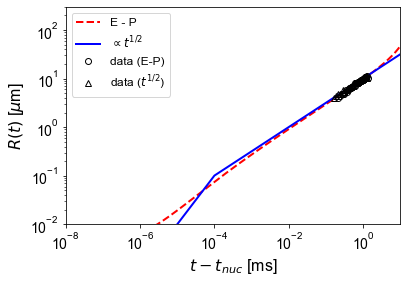

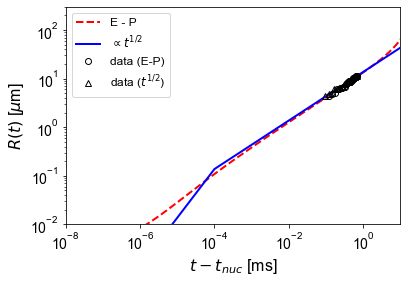

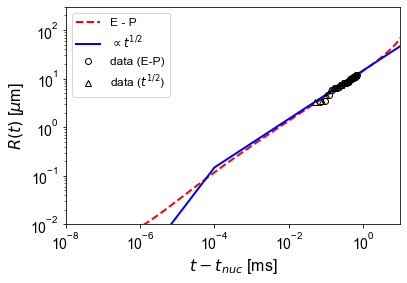

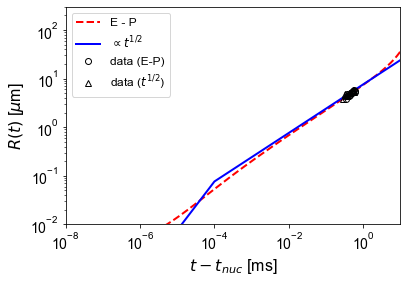

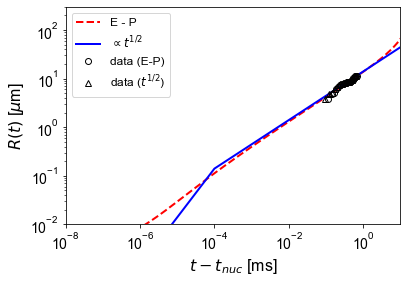

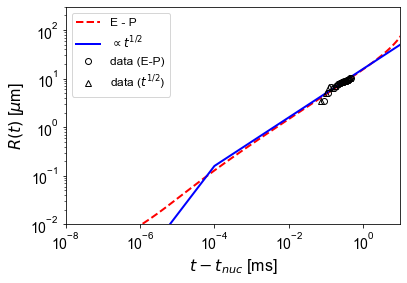

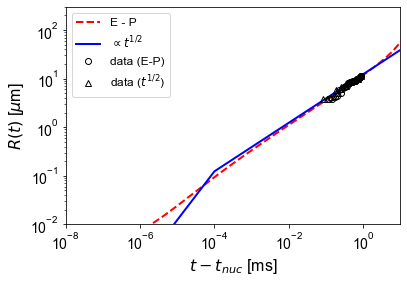

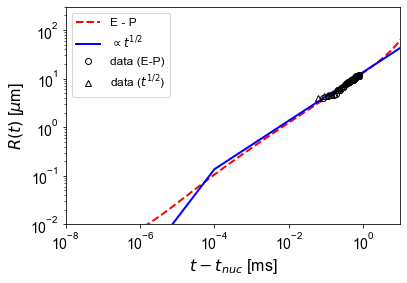

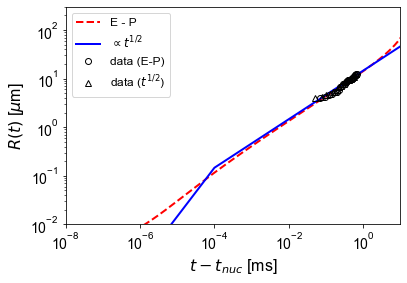

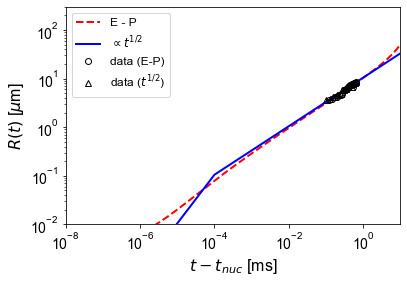

In [66]:
n_plot = 10
x_lim = [1E-8, 10]
y_lim = [1E-2, 300]

# plot parameters
n_bins = 40
t_fs = 18
ax_fs = 18
tk_fs = 14

dt_nuc = []
dt_nuc_frac = []
dd_nuc = []

# extracts fit data
ct = 0
for vid_num in data_ep.keys():
    v_ep = data_ep[vid_num]['data']
    v = data_ep[vid_num]['metadata']['v_max']
    v_sqrt = data_sqrt[vid_num]['data']
    for bub_num in v_ep.keys():
        # gets bubble data for each fit method
        bub_ep = v_ep[bub_num]
        bub_sqrt = v_sqrt[bub_num]
        
        # extracts measured bubble data
        t_bub = bub_ep['t_bub']
        R_bub = bub_ep['R_bub']
        # extracts E-P fit data
        t_nuc_ep = bub_ep['t_nuc']
        t_fit_ep = bub_ep['t_fit']
        R_fit_ep = bub_ep['R_fit']
        D_ep = bub_ep['D']
        t_nuc_ep = bub_ep['t_nuc']
        # extracts sqrt fit data
        t_nuc_sqrt = bub_sqrt['t_nuc']
        t_fit_sqrt = bub_sqrt['t_fit']
        R_fit_sqrt = bub_sqrt['R_fit']
    
        # computes discrepancy in nucleation time prediction
        dt_nuc += [t_nuc_sqrt - t_nuc_ep]
        dt_nuc_frac += [(t_nuc_sqrt - t_nuc_ep) / t_nuc_ep]
        
        # computes discrepancy in nucleation location
        d_nuc_sqrt = v*t_nuc_sqrt
        d_nuc_ep = v*t_nuc_ep
        dd_nuc += [d_nuc_sqrt - d_nuc_ep]
        
        # continues analysis but stops plotting after reaching requested number of plots
        if ct == n_plot:
            continue
        # plots differences in predictions
        compare_ep_sqrt(t_nuc_ep, t_fit_ep, R_fit_ep, t_nuc_sqrt, t_fit_sqrt, R_fit_sqrt, 
                       t_bub, R_bub, x_lim=x_lim, y_lim=y_lim)
        
        
        ct += 1

(0.0, 2.0)

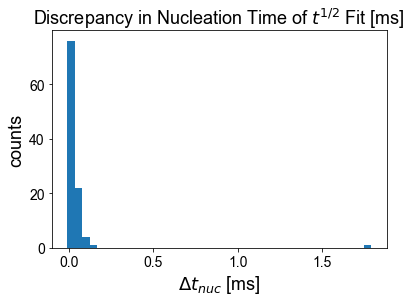

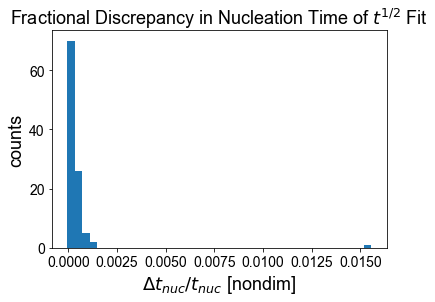

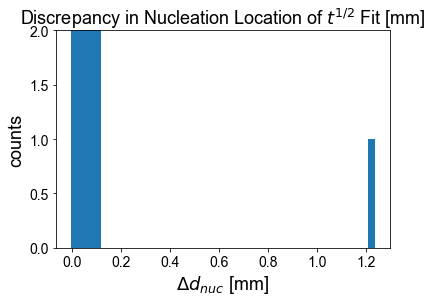

In [71]:
       
# plots distribution of discrepancies in nucleation time
plt.figure()
plt.hist(np.asarray(dt_nuc)*s_2_ms, bins=n_bins)
plt.title(r'Discrepancy in Nucleation Time of $t^{1/2}$ Fit [ms]', fontsize=t_fs)
plt.xlabel(r'$\Delta t_{nuc}$ [ms]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

plt.figure()
plt.hist(dt_nuc_frac, bins=n_bins)
plt.title(r'Fractional Discrepancy in Nucleation Time of $t^{1/2}$ Fit', fontsize=t_fs)
plt.xlabel(r'$\Delta t_{nuc} / t_{nuc}$ [nondim]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

# plots distribution of discrepancies in nucleation location
plt.figure()
plt.hist(np.asarray(dd_nuc)*m_2_mm, bins=n_bins)
plt.title(r'Discrepancy in Nucleation Location of $t^{1/2}$ Fit [mm]', fontsize=t_fs)
plt.xlabel(r'$\Delta d_{nuc}$ [mm]', fontsize=ax_fs)
plt.ylabel('counts', fontsize=ax_fs)
plt.tick_params(axis='both', labelsize=tk_fs)

Only 1 of 104 bubbles had an error in the estimated distance of nucleation greater than 0.15 mm, and its error was 1.2 mm, which is not catastrophic. **Therefore, I conclude that fitting fit a square-root model is equally accurate as the Epstein - Plesset model at predicting the nucleation distance.**

In [70]:
len(dd_nuc)

104